In [1]:
# Версия
from platform import python_version
print(python_version())

3.9.13


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import sklearn

In [63]:
import sklearn
from matplotlib.cbook import boxplot_stats
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, RidgeCV, ElasticNetCV
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam

In [177]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow import keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.models import Sequential
from numpy.random import seed
from scipy import stats
from pandas import read_excel, DataFrame, Series
import warnings
warnings.filterwarnings("ignore")

In [6]:
df_bp = pd.read_excel(r"C:\Users\Александр\Desktop\вкр\github\data\X_bp.xlsx")
df_bp.shape

(1023, 11)

In [7]:
# Удаляем первый неинформативный столбец
df_bp.drop(['Unnamed: 0'], axis=1, inplace=True)
# Посмотрим на первые 5 строк первого датасета, первый столбец удалился
df_bp.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [8]:
# Проверим размерность первого файла
df_bp.shape

(1023, 10)

In [9]:
# Загружаем второй датасет (углепластик) 
df_nup = pd.read_excel(r"C:\Users\Александр\Desktop\вкр\github\data\X_nup.xlsx")
df_nup.shape

(1040, 4)

In [10]:
# Удаляем первый неинформативный столбец
df_nup.drop(['Unnamed: 0'], axis=1, inplace=True)
# Посмотрим на первые 5 строк второго датасета и убедимся, что и здесь не нужный первый столбец успешно удалился
df_nup.head()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,4.0,57.0
1,0,4.0,60.0
2,0,4.0,70.0
3,0,5.0,47.0
4,0,5.0,57.0


In [21]:
# Но наша задача собрать исходные данные файлы в один, единый набор данных. 
# По условию задачи объединяем их по типу INNER. 
df_full = df_bp.join(df_nup, how='inner') #объединяем
df_full.shape

(1023, 13)

In [22]:
# Посмотрим на начальные и конечные строки нашего датасета на данном этапе работы
df_full

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


In [23]:
# Просмотрим информацию о датасете
df_full.info()
# Только "Угол нашивки, град" имеет тип int64(целочисленные значения), все остальные признаки float64(числа с плавающей точкой).
# Датасет не нуждается в преобразовании типов значений

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [24]:
# Изучим описательную статистику наших данных (максимальное, минимальное, квартили, медиана, стандартное отклонение, среднее значение и т.д.), посмотрим на основные параметры анализа данных
df_full.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


In [25]:
# Проверим на пропущенные данные
df_full.isnull().sum()
# Пропущенных данных нет = нулевых значений нет, очистка не требуется

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [26]:
# Создадим переменную для названия всех столбцов. Это нам пригодится при построении моделей. И перейдем к визуализации данных
df_full.columns
# column_names = ["Соотношение матрица-наполнитель","Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%",
# "Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2",
# "Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",
# "Угол нашивки, град","Шаг нашивки","Плотность нашивки"]
column_names = df.columns

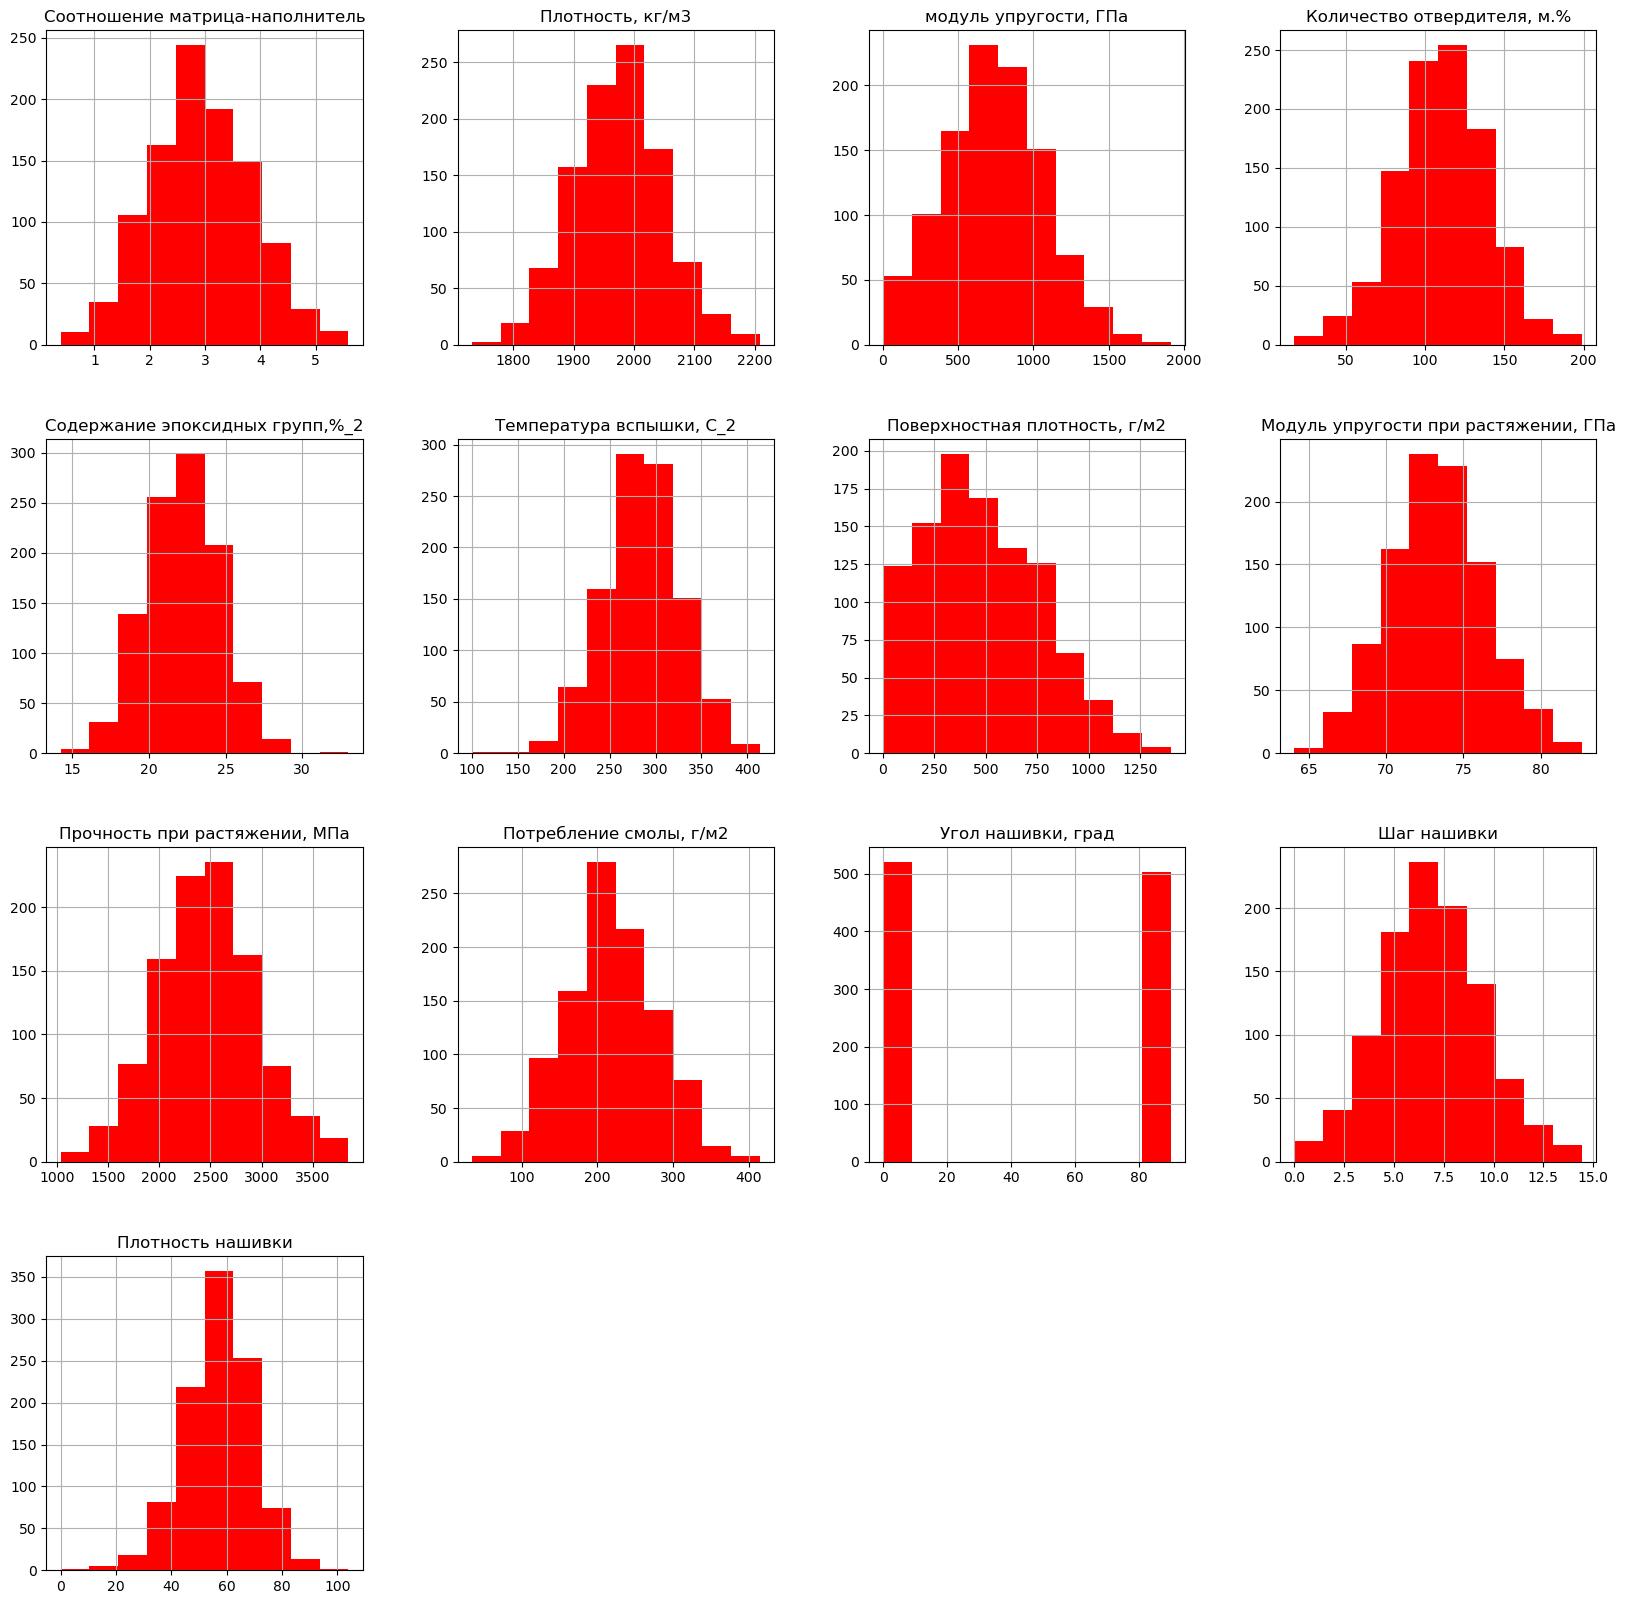

In [27]:
# Построим гистограммы распределения каждой из переменных без нормализации и исключения шумов
df_full.hist(figsize = (20,20), color = "r")
plt.show()

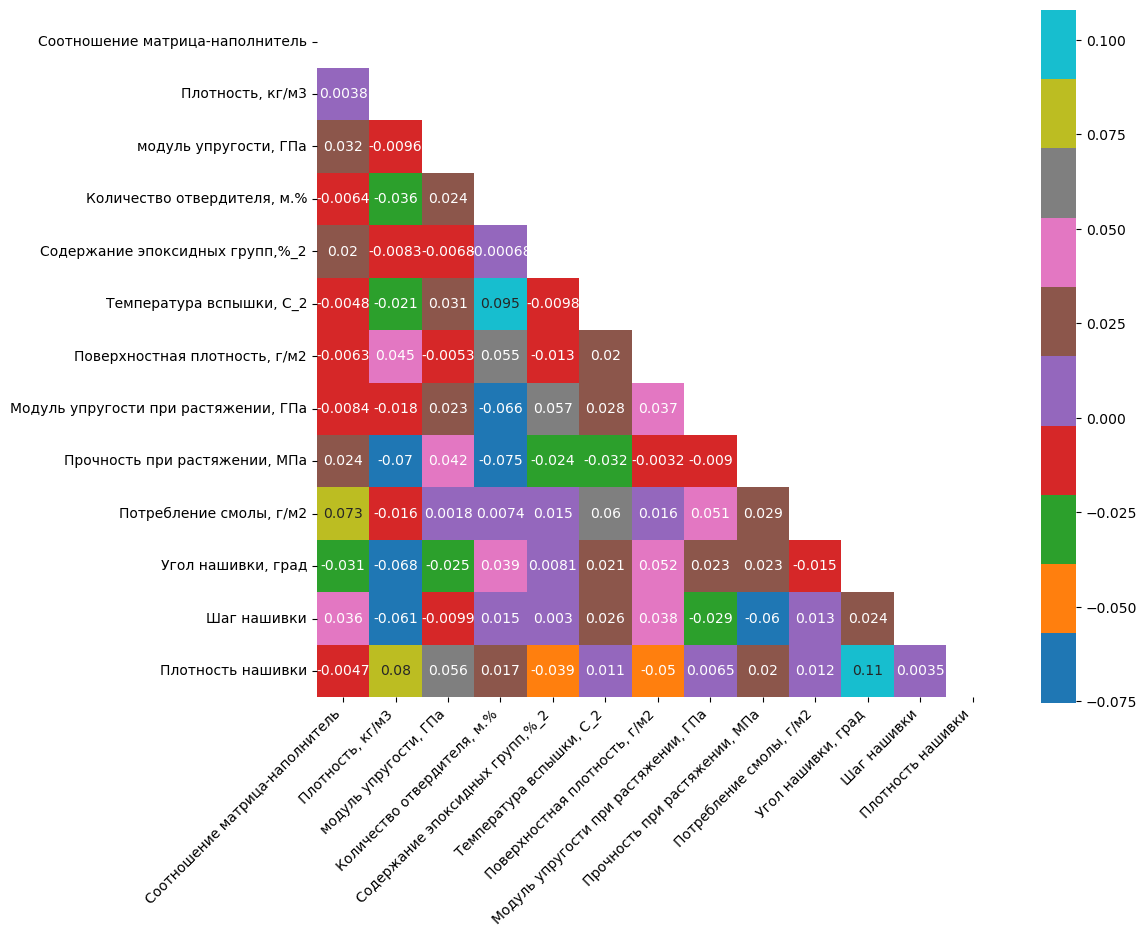

In [28]:
#Визуализация корреляционной матрицы с помощью тепловой карты
mask = np.triu(df.corr())
# Создаем полотно для отображения большого графика
f, ax = plt.subplots(figsize = (11, 9))
# # Визуализируем данные кореляции и создаем цветовую палитру
sns.heatmap(df.corr(), mask = mask, annot = True, square = True, cmap = 'tab10')
plt.xticks(rotation = 45, ha='right')
plt.show()
# Максимальная корреляция между Плотностью нашивки и углом нашивки и составляет 0.11, что говорит об отсутствии зависимости между этими данными. 
# Корреляция между всеми параметрами очень близка к 0, что говорит об отсутствии корреляционных связей между переменными.

Количество выбросов в столбце "Соотношение матрица-наполнитель": 6
Количество выбросов в столбце "Плотность, кг/м3": 9
Количество выбросов в столбце "модуль упругости, ГПа": 2
Количество выбросов в столбце "Количество отвердителя, м.%": 14
Количество выбросов в столбце "Содержание эпоксидных групп,%_2": 2
Количество выбросов в столбце "Температура вспышки, С_2": 8
Количество выбросов в столбце "Поверхностная плотность, г/м2": 2
Количество выбросов в столбце "Модуль упругости при растяжении, ГПа": 6
Количество выбросов в столбце "Прочность при растяжении, МПа": 11
Количество выбросов в столбце "Потребление смолы, г/м2": 8
Количество выбросов в столбце "Угол нашивки, град": 0
Количество выбросов в столбце "Шаг нашивки": 4
Количество выбросов в столбце "Плотность нашивки": 21
Общее количество выбросов: 93


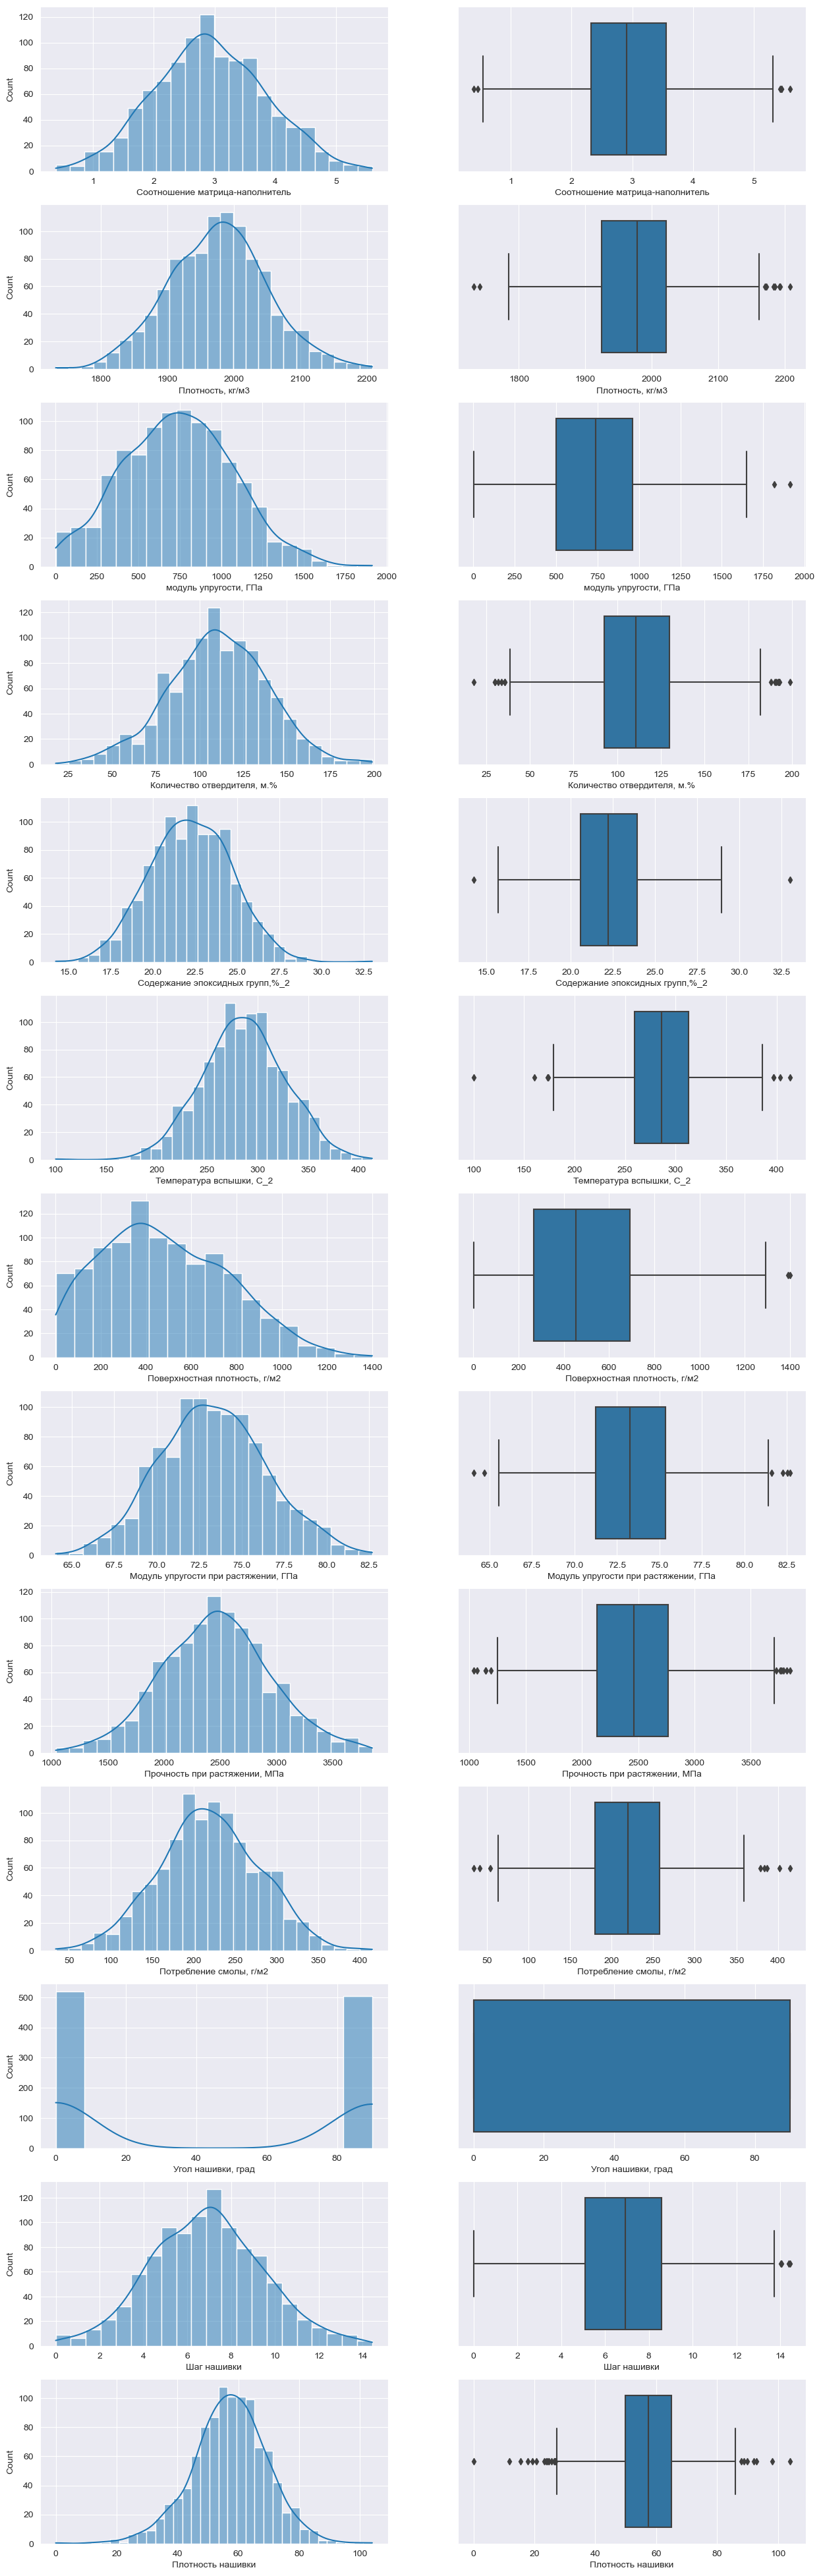

In [55]:
# Проверяем количество выбросов по столбцам.
# Строим гистограммы распределения. Данные стремятся к нормальному распределению, кроме "угла нашивки".
# "Угол нашивки" может принимать лишь два значения.
# Строим "ящики с усами", на них обнаружены выбросы во всех стобцах, кроме "угла нашивки".
fig, axes = plt.subplots(nrows=13, ncols=2, figsize=(15, 50))
count = 0
for k, column in enumerate(df_full.columns):    
    sns.histplot(data=df_full, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=df_full, x=column, ax=axes[k, 1])
    outlier = boxplot_stats(X=df_full[column])
    #print(outlier)
    print (f'Количество выбросов в столбце "{column}": {len(outlier[0]["fliers"])}')
    count+=len(outlier[0]["fliers"])
print(f'Общее количество выбросов: {count}')
plt.show()

In [56]:
# На неочищенному датасете закономерностей не было выявлено. Попробуем очистить и поискать заново.
# Удаляем выбросы из датасета.
# Очищенный датасет назовем ds_clean, старый датасет ds_full оставим неизменным.
df_clean = df_full.copy()
for column in df_clean.columns:
    q75, q25 = np.percentile(df_clean.loc[:,column], [75,25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
    df_clean.loc[df_clean[column] < min, column] = np.nan
    df_clean.loc[df_clean[column] > max, column] = np.nan
df_clean.dropna(inplace = True)
df_clean.shape

(936, 13)

In [40]:
# Метод 3-х сигм
metod_3s = 0
count_3s = [] # Список, куда записывается количество выбросов по каждой колонке датафрейма.
for column in df_clean:
    d = df.loc[:, [column]]
    # методом 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    metod_3s += d['3s'].sum()
    count_3s.append(d['3s'].sum())
    print(column,'3s', ': ', d['3s'].sum()) 
print('Метод 3-х сигм, выбросов:', metod_3s)

Соотношение матрица-наполнитель 3s :  0
Плотность, кг/м3 3s :  3
модуль упругости, ГПа 3s :  2
Количество отвердителя, м.% 3s :  2
Содержание эпоксидных групп,%_2 3s :  2
Температура вспышки, С_2 3s :  3
Поверхностная плотность, г/м2 3s :  2
Модуль упругости при растяжении, ГПа 3s :  0
Прочность при растяжении, МПа 3s :  0
Потребление смолы, г/м2 3s :  3
Угол нашивки, град 3s :  0
Шаг нашивки 3s :  0
Плотность нашивки 3s :  7
Метод 3-х сигм, выбросов: 24


In [42]:
# Удалим выборосы методом 3-х сигм
m_3s = pd.DataFrame(index=df.index)
for column in df:
    zscore = (df[column] - df[column].mean()) / df[column].std()
    m_3s[column] = (zscore.abs() > 3)
df_clean = df_clean[m_3s.sum(axis=1)==0]
df_clean.shape

(922, 13)

In [44]:
# Сохраняем датасет ds_clean в файл ds_clean.csv
df_clean.to_csv('ds_clean.csv')

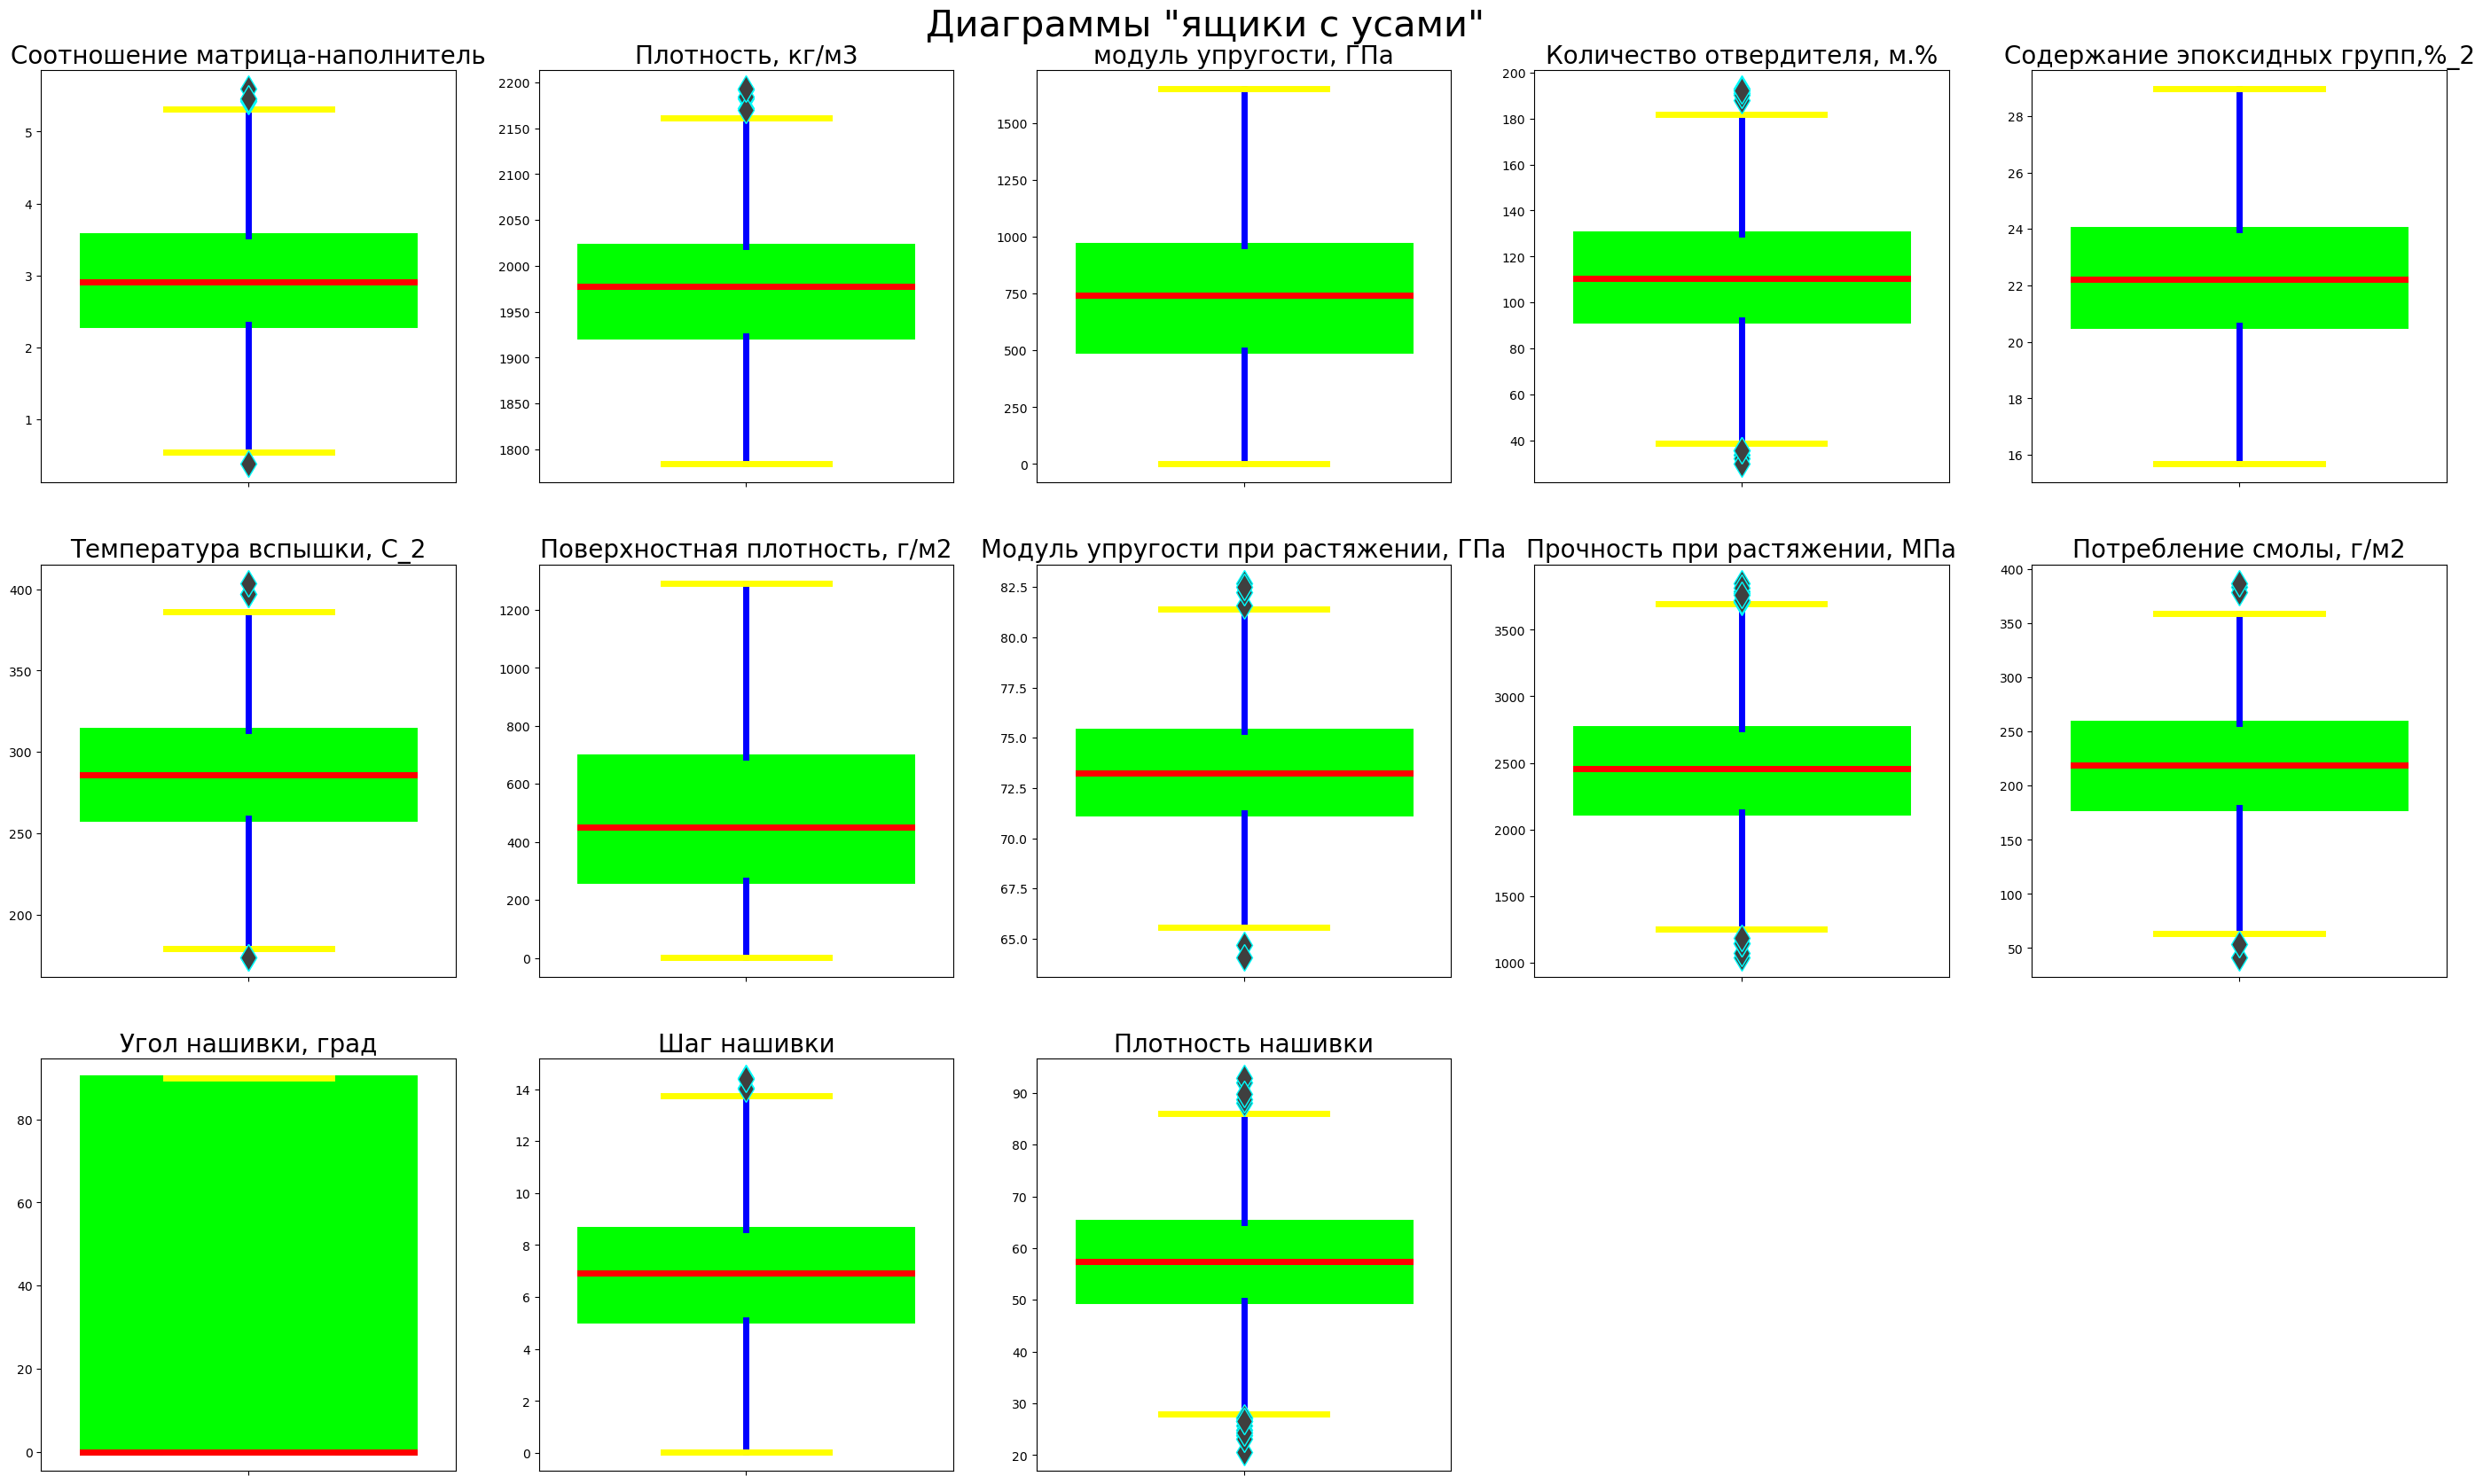

In [45]:
# Теперь посмотрим на очищенный усатый график 
a = 5 
b = 5 
c = 1 

plt.figure(figsize = (35,35))
plt.suptitle('Диаграммы "ящики с усами"', y = 0.9 ,
             fontsize = 30)
for col in df_clean.columns:
    plt.subplot(a, b, c)
    #plt.figure(figsize=(7,5))
    sns.boxplot(data = df, y = df[col], fliersize = 15, linewidth = 5, boxprops = dict(facecolor = 'y', color = 'lime'), medianprops = dict(color = 'r'), whiskerprops = dict(color = "b"), capprops = dict(color="yellow"), flierprops = dict(color = "y", markeredgecolor = "Aqua"))
    plt.ylabel(None)
    plt.title(col, size = 20)
    #plt.show()
    c += 1

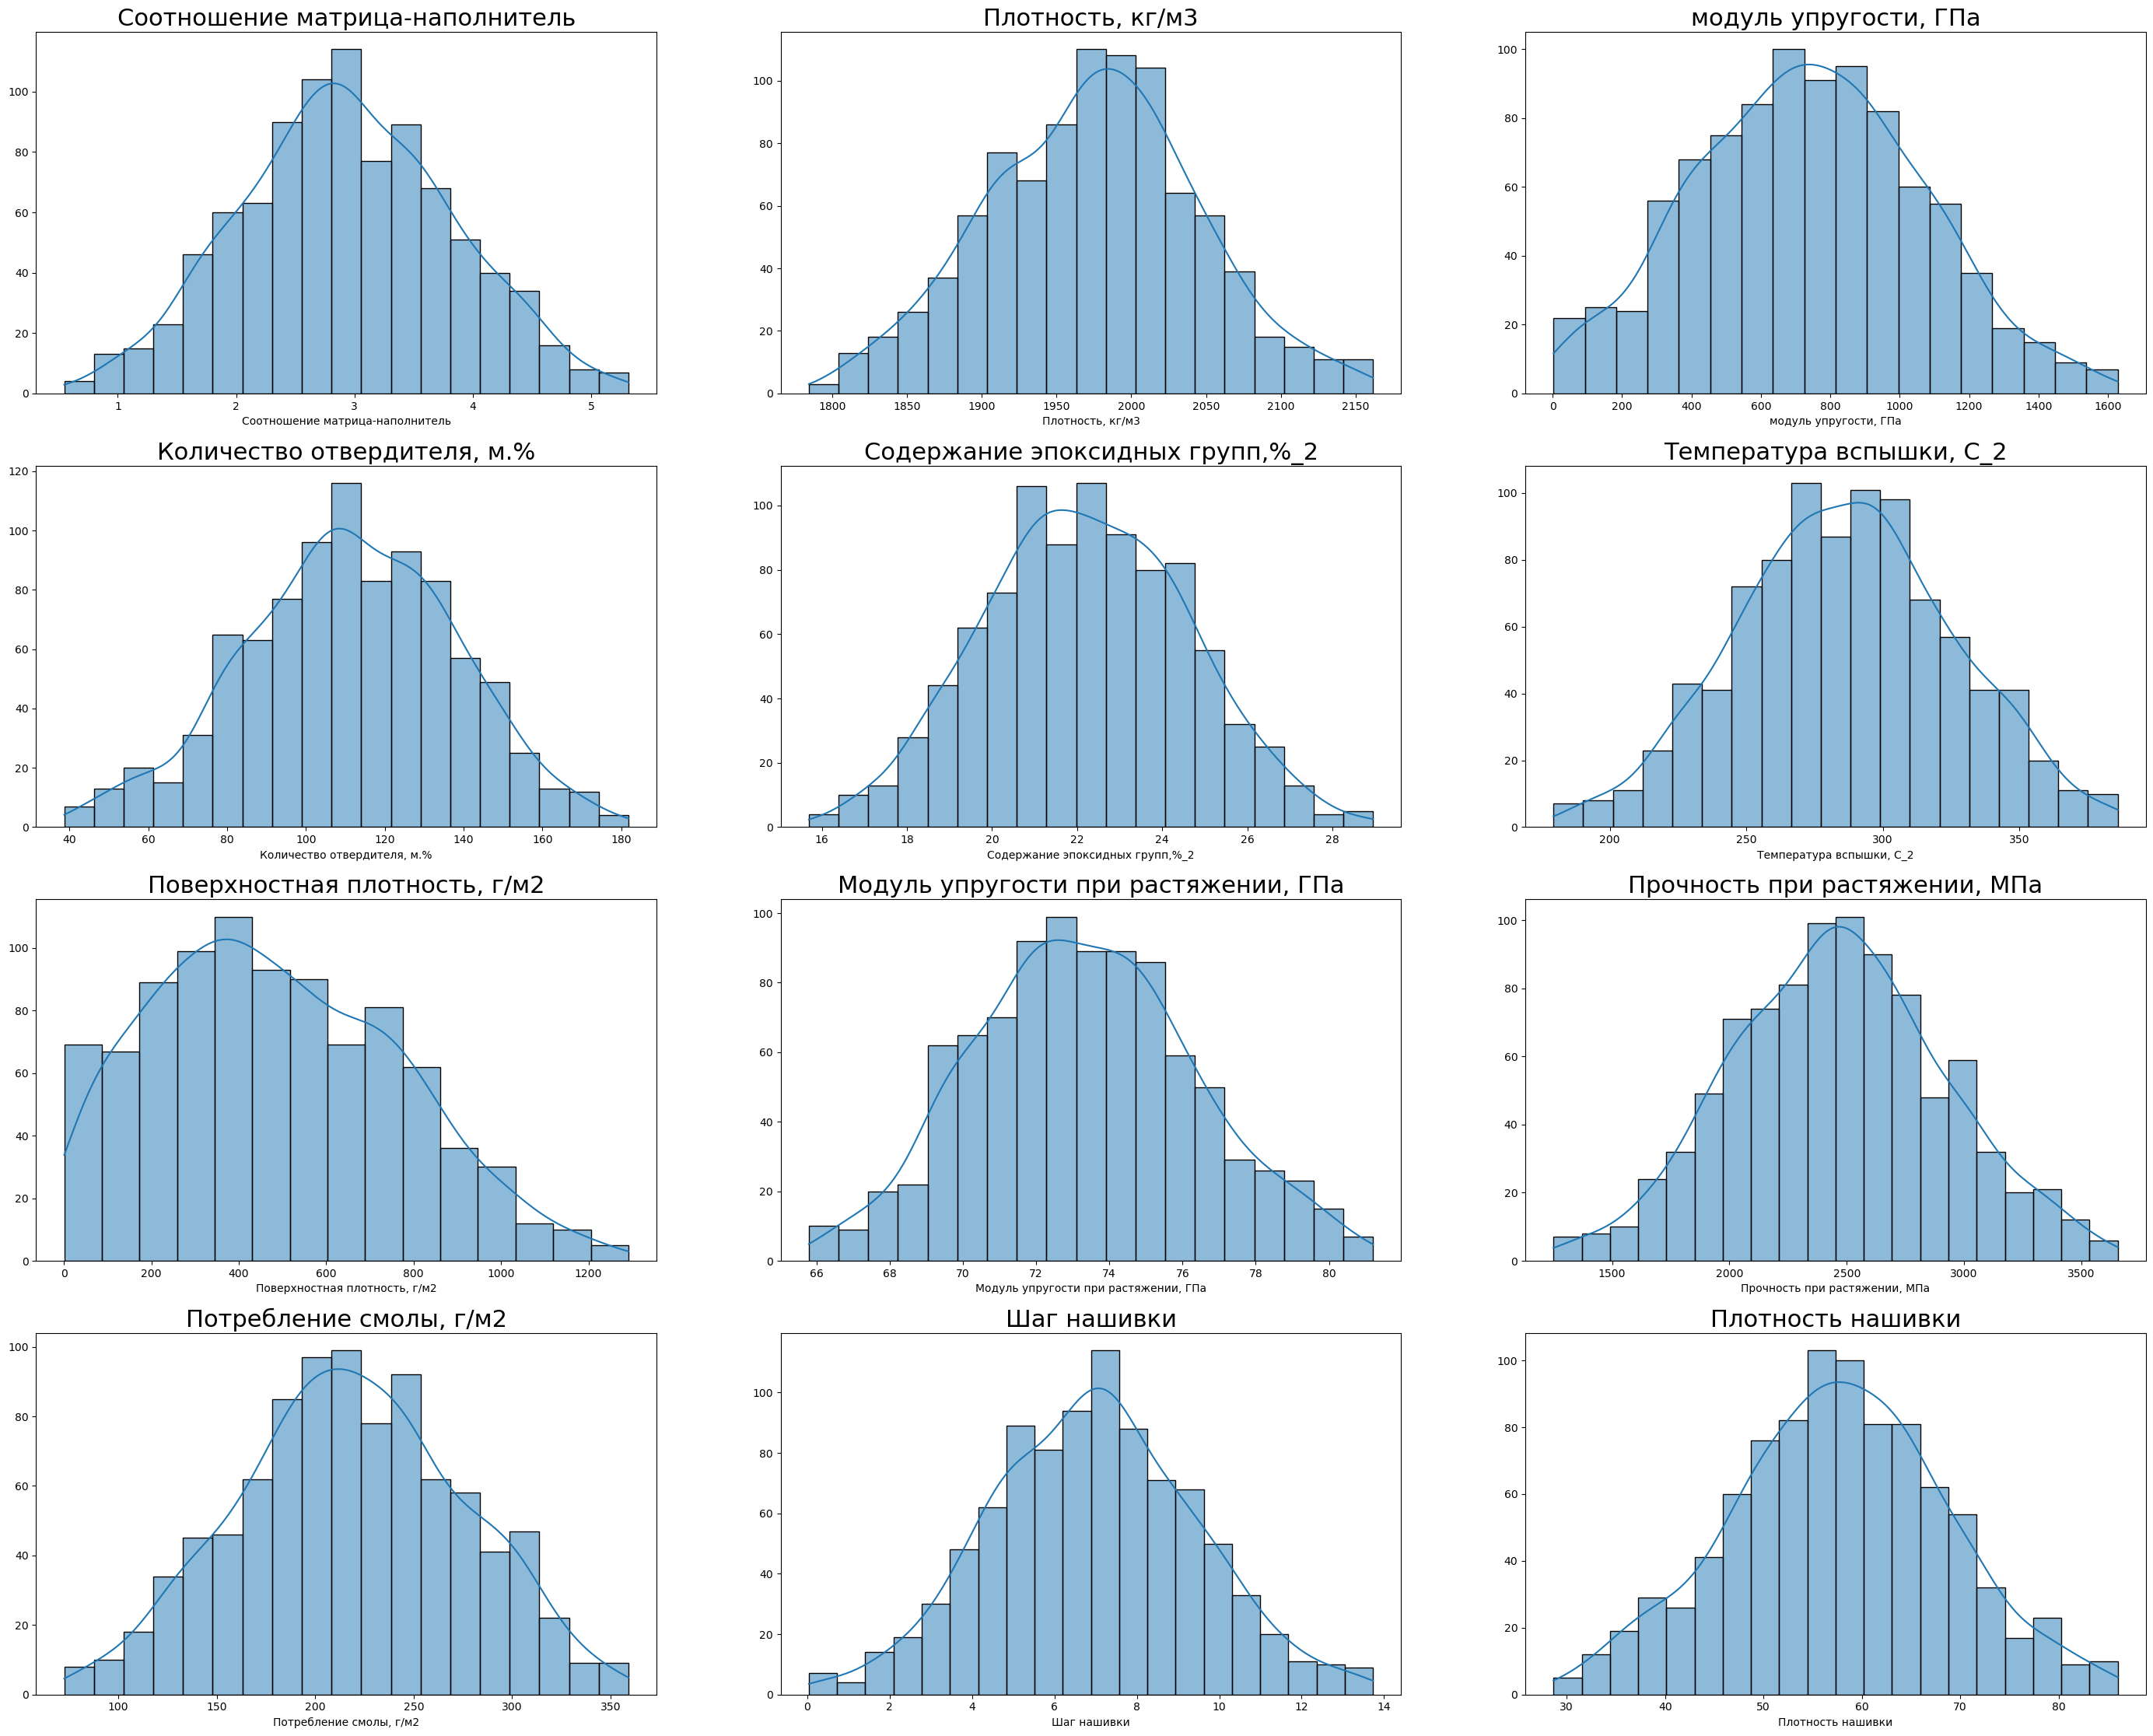

In [47]:
# Посмотрим  графики распределения переменных на очищенных данных
a = 5
b = 3
c = 1

plt.figure(figsize=(35,35))

for col in df_clean.columns:
  if col!='Угол нашивки, град':
    plt.subplot(a, b, c)
    sns.histplot(data = df_clean[col], kde=True)
    plt.ylabel(None)
    plt.title(col, size = 22)
    c+=1

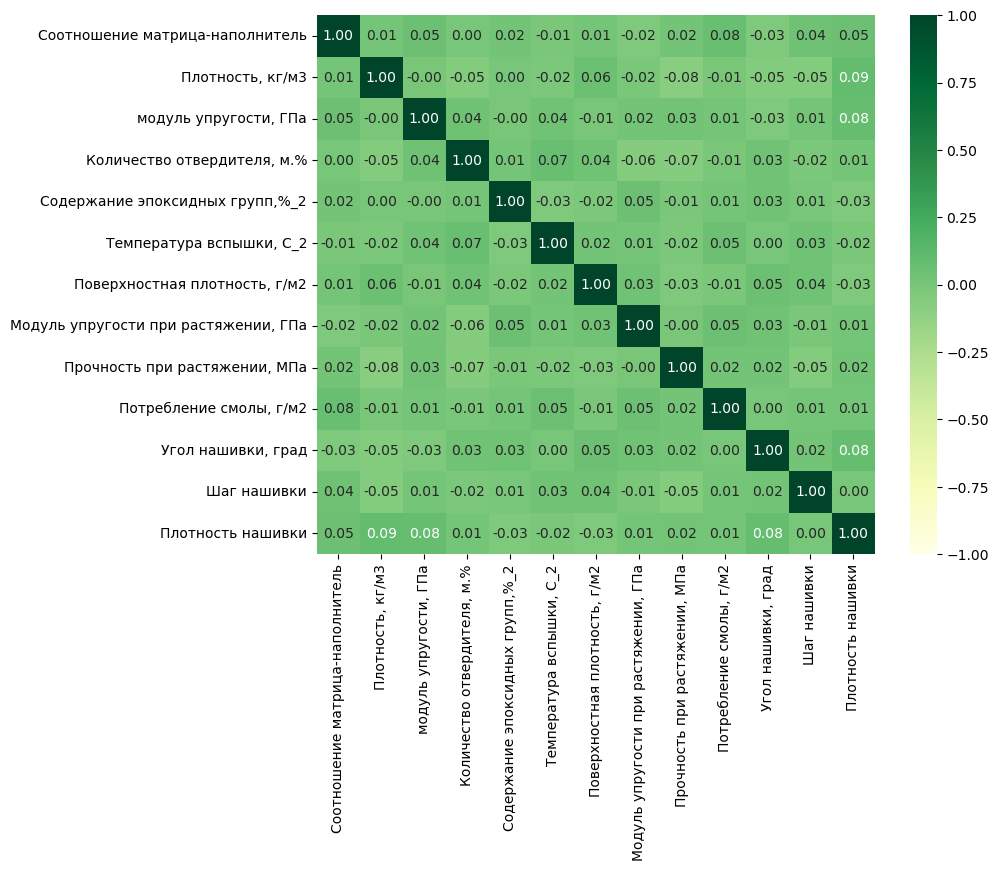

In [48]:
# Корреляционная матрица
corr = df_clean.corr()
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='YlGn', ax=ax)
plt.show()

In [67]:
#Сохраняем идеальный, без выбросов датасет, чтобы в excel проверить дополнительно
df_clean.to_excel("C:\\Users\\Александр\\Desktop\\вкр\\clean.xlsx")
# Сохраняем датасет ds_clean в файл ds_clean.csv
df_clean.to_csv('ds_clean.csv')

In [68]:
df_norm = df_clean.copy()

<AxesSubplot:ylabel='Density'>

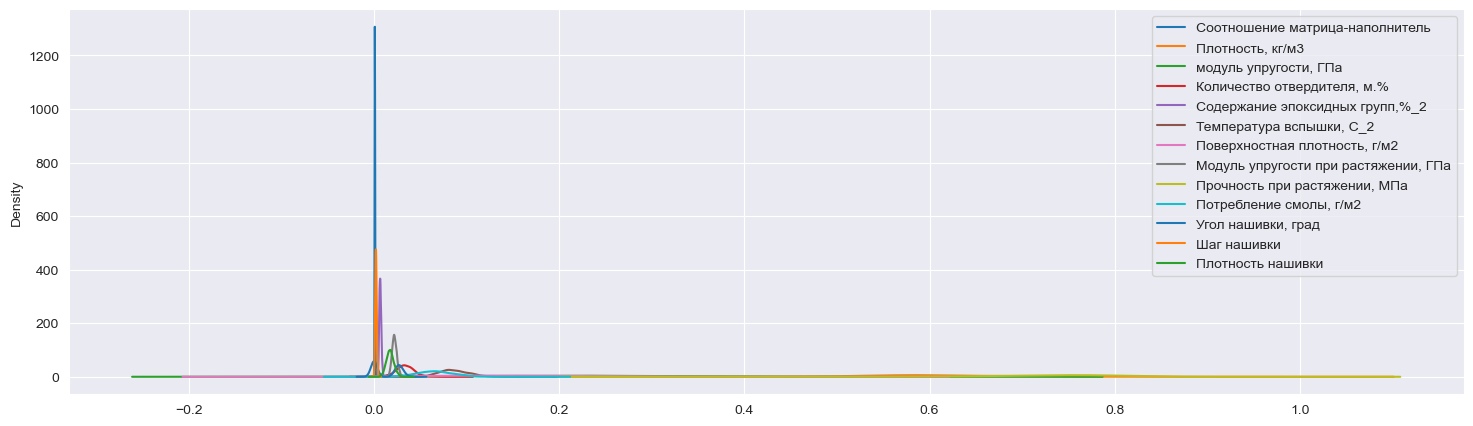

In [74]:
#строим график ядерной оценки плотности наших признаков до нормализации
fig, ax = plt.subplots(figsize = (18, 5))
df_norm.plot(kind = 'kde', ax = ax)

In [75]:
# Нормализуем
scaler = preprocessing.MinMaxScaler()
col = df_norm.columns
result = scaler.fit_transform(df)

df_norm = pd.DataFrame(result, columns = col)
df_norm.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.489568,0.467648,0.447024,0.496427,0.493216,0.488654,0.371301,0.497322,0.507902,0.512370,0.496000,0.477193,0.507027
std,0.174687,0.178696,0.198876,0.171089,0.179818,0.174792,0.215155,0.167158,0.172506,0.170432,0.500234,0.177586,0.163634
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.370964,0.340831,0.302576,0.384097,0.368597,0.371985,0.206374,0.386234,0.390414,0.401220,0.000000,0.351886,0.405037
50%,0.484284,0.472347,0.448525,0.495388,0.492154,0.488205,0.348844,0.492609,0.504890,0.513653,0.000000,0.477999,0.509730
75%,0.608289,0.579727,0.582408,0.613258,0.624396,0.606271,0.535295,0.605138,0.612932,0.625772,1.000000,0.593714,0.612766
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
normalizer = Normalizer()
res = normalizer.fit_transform(df)
df_norm = pd.DataFrame(res, columns = df_norm.columns)
df_norm

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.000499,0.545436,0.198490,0.013434,0.006381,0.076473,0.056424,0.018808,0.806064,0.059111,0.000000,0.001075,0.016121
1,0.000499,0.545011,0.198335,0.034634,0.005705,0.080543,0.056380,0.018793,0.805435,0.059065,0.000000,0.001342,0.012618
2,0.000744,0.544829,0.202097,0.030022,0.005976,0.076388,0.056362,0.018787,0.805167,0.059046,0.000000,0.001342,0.015298
3,0.000746,0.539271,0.201687,0.030161,0.006004,0.076742,0.056623,0.018874,0.808906,0.059320,0.000000,0.001348,0.016178
4,0.000699,0.519919,0.219673,0.030449,0.006062,0.077475,0.057164,0.019055,0.816627,0.059886,0.000000,0.001361,0.019055
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000700,0.601520,0.281289,0.026806,0.006201,0.100077,0.064463,0.022522,0.735625,0.038520,0.027733,0.002797,0.014489
996,0.001078,0.641541,0.139172,0.045683,0.006133,0.079552,0.109733,0.022819,0.738645,0.036842,0.028164,0.003306,0.016820
997,0.000953,0.572927,0.121081,0.032107,0.006959,0.072161,0.214994,0.021709,0.773510,0.068729,0.026143,0.001209,0.019645
998,0.001191,0.664389,0.238353,0.045454,0.006187,0.088652,0.206205,0.023802,0.665970,0.063368,0.028931,0.002029,0.018728


In [78]:
#Нормализуем данные с помощью MinMaxScaler()
scaler = preprocessing.MinMaxScaler()
col = df_norm.columns
result = scaler.fit_transform(df)
df_n = pd.DataFrame(result, columns = col)
df_n.describe()


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.489568,0.467648,0.447024,0.496427,0.493216,0.488654,0.371301,0.497322,0.507902,0.512370,0.496000,0.477193,0.507027
std,0.174687,0.178696,0.198876,0.171089,0.179818,0.174792,0.215155,0.167158,0.172506,0.170432,0.500234,0.177586,0.163634
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.370964,0.340831,0.302576,0.384097,0.368597,0.371985,0.206374,0.386234,0.390414,0.401220,0.000000,0.351886,0.405037
50%,0.484284,0.472347,0.448525,0.495388,0.492154,0.488205,0.348844,0.492609,0.504890,0.513653,0.000000,0.477999,0.509730
75%,0.608289,0.579727,0.582408,0.613258,0.624396,0.606271,0.535295,0.605138,0.612932,0.625772,1.000000,0.593714,0.612766
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='Density'>

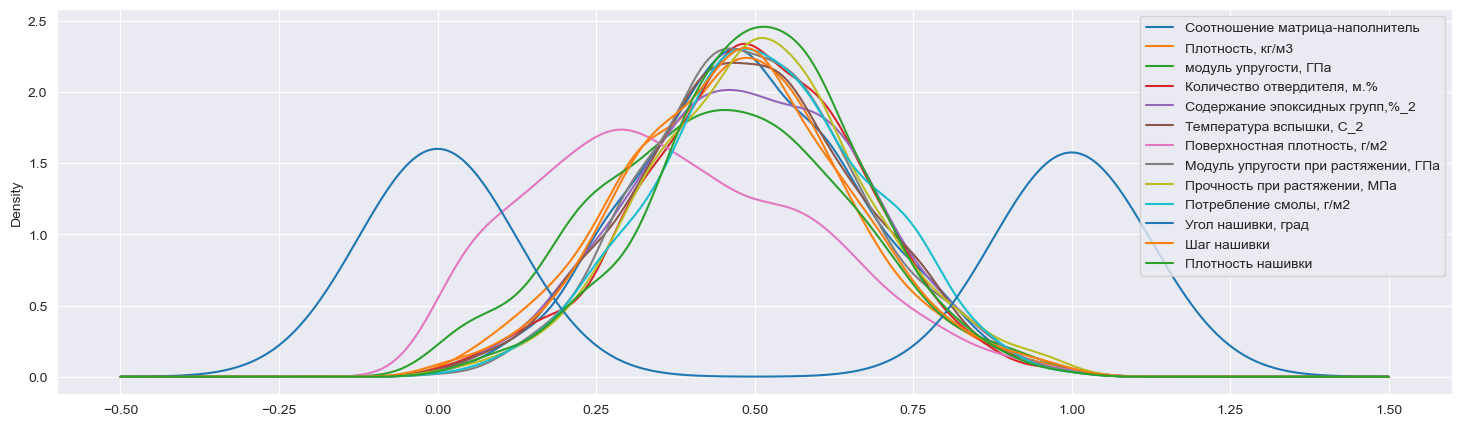

In [80]:
fig, ax = plt.subplots(figsize = (18, 5))
df_n.plot(kind = 'kde', ax = ax)

 Разбиение на обучающую и тестовую выборки


In [82]:
X_var = df_n.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
y_var = df_n[['Модуль упругости при растяжении, ГПа']]

# Разбиение на обучающую и тестовую выборки для прогноза модуля упругости при растяжении
X_train_var, X_test_var, y_train_var, y_test_var = train_test_split(X_var, y_var, test_size=0.3, random_state=1)

In [83]:
# Линейная регрессия.
lr = LinearRegression()

#обучаем модель для предсказания признака "Модуль упругости при растяжении"
lr.fit(X_train_var, y_train_var.iloc[:, 0])
lr_pred_var = lr.predict(X_test_var)
lr_mae_var = mean_absolute_error(lr_pred_var, y_test_var)
lr_mse_var = mean_squared_error(y_test_var, lr_pred_var)
lr_r2_train_var = lr.score(X_train_var, y_train_var)
lr_r2_var = r2_score(y_test_var, lr_pred_var)
print('LinearRegression Results')
print(f'mae: {lr_mae_var.round(3)}')
print(f'mse: {lr_mse_var.round(3)}')
print(f'R2 на тренировочной выборке: {lr_r2_train_var.round(3)}')
print(f'R2 на тестовой выборке: {lr_r2_var.round(3)}')

LinearRegression Results
mae: 0.132
mse: 0.026
R2 на тренировочной выборке: 0.025
R2 на тестовой выборке: -0.014


In [84]:
#Гребневая регрессия 
ridge = RidgeCV()

#обучаем модель для предсказания признака "Модуль упругости при растяжении"
ridge.fit(X_train_var, y_train_var.iloc[:, 0])
ridge_pred_var = ridge.predict(X_test_var)
ridge_mae_var = mean_absolute_error(ridge_pred_var, y_test_var)
ridge_mse_var = mean_squared_error(y_test_var, ridge_pred_var)
ridge_r2_train_var = ridge.score(X_train_var, y_train_var)
ridge_r2_var= r2_score(y_test_var, ridge_pred_var)
print('RidgeCV Results')
print(f'mae: {ridge_mae_var.round(3)}')
print(f'mse: {ridge_mse_var.round(3)}')
print(f'R2 на тренировочной выборке: {ridge_r2_train_var.round(3)}')
print(f'R2 на тестовой выборке: {ridge_r2_var.round(3)}')

RidgeCV Results
mae: 0.132
mse: 0.026
R2 на тренировочной выборке: 0.022
R2 на тестовой выборке: -0.006


In [85]:
#LASSO (Least Absolute Shrinkage and Selection Operator)
LCV = LassoCV()

#обучаем модель для предсказания признака "Модуль упругости при растяжении"
LCV.fit(X_train_var, y_train_var.iloc[:, 0])
LCV_pred_var = LCV.predict(X_test_var)
LCV_mae_var = mean_absolute_error(LCV_pred_var, y_test_var)
LCV_mse_var = mean_squared_error(y_test_var, LCV_pred_var)
LCV_r2_train_var = LCV.score(X_train_var, y_train_var)
LCV_r2_var = r2_score(y_test_var, LCV_pred_var)
print('LassoCV Results')
print(f'mae: {LCV_mae_var.round(3)}')
print(f'mse: {LCV_mse_var.round(3)}')
print(f'R2 на тренировочной выборке: {LCV_r2_train_var.round(3)}')
print(f'R2 на тестовой выборке: {LCV_r2_var.round(3)}')

LassoCV Results
mae: 0.132
mse: 0.026
R2 на тренировочной выборке: 0.0
R2 на тестовой выборке: -0.003


In [86]:
#ElasticNet стремится объединить лучшее из гребневой регрессии и регрессии лассо, комбинируя регуляризацию L1 и L2
elastic = ElasticNetCV()

#обучаем модель для предсказания признака "Модуль упругости при растяжении"
elastic.fit(X_train_var, y_train_var.iloc[:, 0])
elastic_pred_var = (elastic.predict(X_test_var))
elastic_mae_var = mean_absolute_error(elastic_pred_var, y_test_var)
elastic_mse_var = mean_squared_error(y_test_var, elastic_pred_var)
elastic_r2_train_var = elastic.score(X_train_var, y_train_var)
elastic_r2_var = r2_score(y_test_var, elastic_pred_var)
print('ElasticNetCV Results')
print(f'mae: {elastic_mae_var.round(3)}')
print(f'mse: {elastic_mse_var.round(3)}')
print(f'R2 на тренировочной выборке: {elastic_r2_train_var.round(3)}')
print(f'R2 на тестовой выборке: {elastic_r2_var.round(3)}')

ElasticNetCV Results
mae: 0.132
mse: 0.026
R2 на тренировочной выборке: 0.0
R2 на тестовой выборке: -0.003


In [87]:
#из-за специфической и высокодисперсной природы регрессии, просто как задачи машинного обучения, 
#регрессоры дерева решений следует тщательно обрезать. для поиска оптимальной глубины дерева необходимо применить
#инструмент оптимизации поиска параметров GridSearchCV

#параметры, подаваемые на перекрестную проверку методу поиска по сетке
rfr_param_grid = {'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
                  'n_estimators': [1, 10, 20],
                  'max_depth': [1, 2, 5]}

#задаём параметры поиска лучшей комбинации гиперпараметров
rfr_gs_var = GridSearchCV(RandomForestRegressor(), rfr_param_grid, cv=9, n_jobs=-1, verbose=1)

rfr_gs_var.fit(X_train_var, y_train_var.iloc[:, 0]) #применяем поиск
print(f"Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {rfr_gs_var.best_params_}") #выводим лучшие параметры д

Fitting 9 folds for each of 36 candidates, totalling 324 fits
Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {'criterion': 'squared_error', 'max_depth': 1, 'n_estimators': 10}


In [88]:
# Обучаем модель для предсказания признака "Модуль упругости при растяжении"
rfr = RandomForestRegressor(criterion='squared_error', n_estimators=1, max_depth=1)
rfr.fit(X_train_var, y_train_var.iloc[:, 0])
rfr_pred_var = rfr.predict(X_test_var)
rfr_mae_var = mean_absolute_error(rfr_pred_var, y_test_var)
rfr_mse_var = mean_squared_error(y_test_var, rfr_pred_var)
rfr_r2_train_var = rfr.score(X_train_var, y_train_var)
rfr_r2_var = r2_score(y_test_var, rfr_pred_var)
print('RandomForestRegressor Results')
print(f'mae: {rfr_mae_var.round(3)}')
print(f'mse: {rfr_mse_var.round(3)}')
print(f'R2 на тренировочной выборке: {rfr_r2_train_var.round(3)}')
print(f'R2 на тестовой выборке: {rfr_r2_var.round(3)}')

RandomForestRegressor Results
mae: 0.132
mse: 0.027
R2 на тренировочной выборке: 0.003
R2 на тестовой выборке: -0.037


In [89]:
# к-соседи 

KNeighbors = list(range(1, 31))
knn_param_grid = {'n_neighbors': range(1, 31)}

#задаём параметры поиска лучшей комбинации гиперпараметров
knn_gs_var = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=9, n_jobs=-1, verbose=1)

knn_gs_var.fit(X_train_var, y_train_var.iloc[:, 0]) #применяем поиск
print(f"Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {knn_gs_var.best_params_}")

Fitting 9 folds for each of 30 candidates, totalling 270 fits
Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {'n_neighbors': 29}


In [90]:
# обучаем
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train_var, y_train_var.iloc[:, 0])
knn_pred_var = knn.predict(X_test_var)
knn_mae_var = mean_absolute_error(knn_pred_var, y_test_var)
knn_mse_var = mean_squared_error(y_test_var, knn_pred_var)
knn_r2_train_var = knn.score(X_train_var, y_train_var)
knn_r2_var = r2_score(y_test_var, knn_pred_var)
print('KNeighborsRegressor Results')
print(f'mae: {knn_mae_var.round(3)}')
print(f'mse: {knn_mse_var.round(3)}')
print(f'R2 на тренировочной выборке: {knn_r2_train_var.round(3)}')
print(f'R2 на тестовой выборке: {knn_r2_var.round(3)}')

KNeighborsRegressor Results
mae: 0.184
mse: 0.053
R2 на тренировочной выборке: 1.0
R2 на тестовой выборке: -1.055


In [91]:
# Опорные вектора
svr_param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
      'C': [0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.005, 0.01, 0.1, 0.5]}

#поиск лучшей комбинации гиперпараметров
svr_gs_var = GridSearchCV(SVR(), svr_param_grid, cv=9, n_jobs=-1, verbose=1)

svr_gs_var.fit(X_train_var, y_train_var.iloc[:, 0]) #применяем поиск
print(f"Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {svr_gs_var.best_params_}") 

Fitting 9 folds for each of 40 candidates, totalling 360 fits
Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {'C': 0.005, 'kernel': 'rbf'}


In [92]:
# обучаем модель 
svr = SVR(C=1e-08, kernel='linear')
svr.fit(X_train_var, y_train_var.iloc[:, 0])
svr_pred_var = svr.predict(X_test_var)
svr_mae_var = mean_absolute_error(svr_pred_var, y_test_var)
svr_mse_var = mean_squared_error(y_test_var, svr_pred_var)
svr_r2_train_var = svr.score(X_train_var, y_train_var)
svr_r2_var = r2_score(y_test_var, svr_pred_var)
print('SVR Results')
print(f'mae: {svr_mae_var.round(3)}')
print(f'mse: {svr_mse_var.round(3)}')
print(f'R2 на тренировочной выборке: {svr_r2_train_var.round(3)}')
print(f'R2 на тестовой выборке: {svr_r2_var.round(3)}')

SVR Results
mae: 0.132
mse: 0.026
R2 на тренировочной выборке: -0.0
R2 на тестовой выборке: -0.005


In [94]:
# Градиентный бустинг
gb_param_grid = {'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'], 
                  'n_estimators': [1, 2, 5, 10],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 5, 10]}

#поиск лучшей комбинации гиперпараметров
gb_gs_var = GridSearchCV(GradientBoostingRegressor(), gb_param_grid, cv=9, 
                   n_jobs=-1, verbose=1)

gb_gs_var.fit(X_train_var, y_train_var.iloc[:, 0])
print(f"Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {gb_gs_var.best_params_}")

Fitting 9 folds for each of 320 candidates, totalling 2880 fits
Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {'loss': 'squared_error', 'max_depth': 5, 'max_features': 1, 'n_estimators': 5}


In [95]:
gb = GradientBoostingRegressor(loss='squared_error', max_depth=1, max_features=1, n_estimators=1)
gb.fit(X_train_var, y_train_var.iloc[:, 0])
gb_pred_var = gb.predict(X_test_var)
gb_mae_var = mean_absolute_error(gb_pred_var, y_test_var)
gb_mse_var = mean_squared_error(y_test_var, gb_pred_var)
gb_r2_train_var = gb.score(X_train_var, y_train_var)
gb_r2_var = r2_score(y_test_var, gb_pred_var)
print('GradientBoostingRegressor Results')
print(f'mae: {gb_mae_var.round(3)}')
print(f'mse: {gb_mse_var.round(3)}')
print(f'R2 на тренировочной выборке: {gb_r2_train_var.round(3)}')
print(f'R2 на тестовой выборке: {gb_r2_var.round(3)}')

GradientBoostingRegressor Results
mae: 0.132
mse: 0.026
R2 на тренировочной выборке: 0.002
R2 на тестовой выборке: -0.0


In [96]:
# Деревья решений
dtr_param_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5, 7, 9, 12],
                  'max_features': range(1, 15, 1)}

dtr_gs_var = GridSearchCV(DecisionTreeRegressor(), dtr_param_grid, cv=9, 
                   n_jobs=-1, verbose=1)

dtr_gs_var.fit(X_train_var, y_train_var.iloc [:, 0])
print(f"Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {dtr_gs_var.best_params_}")

Fitting 9 folds for each of 896 candidates, totalling 8064 fits
Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {'criterion': 'squared_error', 'max_depth': 1, 'max_features': 3, 'splitter': 'best'}


In [97]:
# обучаем
dtr = DecisionTreeRegressor(criterion='squared_error', max_depth=1, max_features=1, splitter='best')
dtr.fit(X_train_var, y_train_var.iloc[:, 0])
dtr_pred_var = dtr.predict(X_test_var)
dtr_mae_var = mean_absolute_error(dtr_pred_var, y_test_var)
dtr_mse_var = mean_squared_error(y_test_var, dtr_pred_var)
dtr_r2_train_var = dtr.score(X_train_var, y_train_var)
dtr_r2_var = r2_score(y_test_var, dtr_pred_var)
print('DecisionTreeRegressor Results')
print(f'mae: {dtr_mae_var.round(3)}')
print(f'mse: {dtr_mse_var.round(3)}')
print(f'R2 на тренировочной выборке: {dtr_r2_train_var.round(3)}')
print(f'R2 на тестовой выборке: {dtr_r2_var.round(3)}')

DecisionTreeRegressor Results
mae: 0.133
mse: 0.027
R2 на тренировочной выборке: 0.005
R2 на тестовой выборке: -0.022


Создаем нейронную сеть

In [98]:
net_var = Sequential() #полносвязная
net_var.add(Dense(128, input_dim=X_train_var.shape[1], activation='relu'))
net_var.add(Dense(8, activation='relu'))
net_var.add(Dense(8, activation='relu'))
net_var.add(Dense(1, activation='linear')) #выходной слой с одним линейным нейроном для решения задачи регресси

In [99]:
#архитектура нашей модели
print(net_var.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 8)                 1032      
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,777
Trainable params: 2,777
Non-trainable params: 0
_________________________________________________________________
None


In [100]:
net_var.compile(optimizer=Adam(0.001), loss='mse', metrics=['mae'])

In [102]:
# обучаем модель для предсказания признака "Модуль упругости при растяжении, ГПа"
history_var = net_var.fit(X_train_var, y_train_var.iloc[:, 0], epochs=100, validation_split=0.1, verbose=1)
print(f'Коэффициент детерминации для признака "{y_train_var.columns[0]}": {r2_score(y_test_var.iloc[:, 0], (net_var.predict(X_test_var)))}')


Epoch 1/100
20/20 [==============================] - 3s 31ms/step - loss: 0.0731 - mae: 0.2189 - val_loss: 0.0276 - val_mae: 0.1268
Epoch 2/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0342 - mae: 0.1462 - val_loss: 0.0249 - val_mae: 0.1152
Epoch 3/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0330 - mae: 0.1456 - val_loss: 0.0258 - val_mae: 0.1204
Epoch 4/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0317 - mae: 0.1419 - val_loss: 0.0237 - val_mae: 0.1128
Epoch 5/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0310 - mae: 0.1404 - val_loss: 0.0248 - val_mae: 0.1197
Epoch 6/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0305 - mae: 0.1393 - val_loss: 0.0227 - val_mae: 0.1115
Epoch 7/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0301 - mae: 0.1381 - val_loss: 0.0226 - val_mae: 0.1121
Epoch 8/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0298 - 

20/20 [==============================] - 0s 8ms/step - loss: 0.0227 - mae: 0.1198 - val_loss: 0.0244 - val_mae: 0.1229
Epoch 64/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0227 - mae: 0.1201 - val_loss: 0.0222 - val_mae: 0.1121
Epoch 65/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0220 - mae: 0.1184 - val_loss: 0.0234 - val_mae: 0.1179
Epoch 66/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0225 - mae: 0.1187 - val_loss: 0.0235 - val_mae: 0.1180
Epoch 67/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0218 - mae: 0.1176 - val_loss: 0.0228 - val_mae: 0.1151
Epoch 68/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0222 - mae: 0.1191 - val_loss: 0.0240 - val_mae: 0.1208
Epoch 69/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0223 - mae: 0.1191 - val_loss: 0.0230 - val_mae: 0.1155
Epoch 70/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0224 - mae: 0

In [103]:
net_pred_var = net_var.predict(X_test_var)
net_mae_var = mean_absolute_error(net_pred_var, y_test_var)
net_mse_var = mean_squared_error(y_test_var, net_pred_var)
net_r2_train_var = r2_score(y_train_var, net_var.predict(X_train_var))
net_r2_var = r2_score(y_test_var, net_pred_var)
print('net Results')
print(f'mae: {net_mae_var.round(3)}')
print(f'mse: {net_mse_var.round(3)}')
print(f'R2 на тренировочной выборке: {net_r2_train_var.round(3)}')
print(f'R2 на тестовой выборке: {net_r2_var.round(3)}')

22/22 [==============================] - 0s 3ms/step
net Results
mae: 0.141
mse: 0.03
R2 на тренировочной выборке: 0.357
R2 на тестовой выборке: -0.151


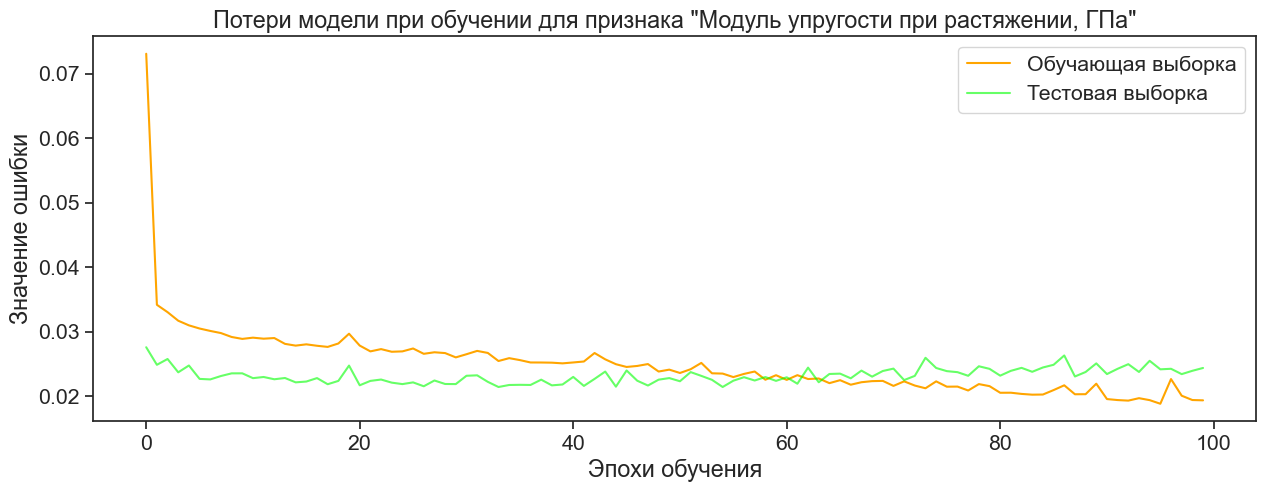

In [104]:
# визуализируем график потерь модели 
plt.figure(figsize = (15, 5))
sns.set(font_scale=1.4, style='ticks')
plt.plot(history_var.history['loss'], color='orange')
plt.plot(history_var.history['val_loss'], color='lime', alpha=0.6)
plt.title('Потери модели при обучении для признака "Модуль упругости при растяжении, ГПа"')
plt.ylabel('Значение ошибки')
plt.xlabel('Эпохи обучения')
plt.legend(['Обучающая выборка', 'Тестовая выборка'])
plt.show()

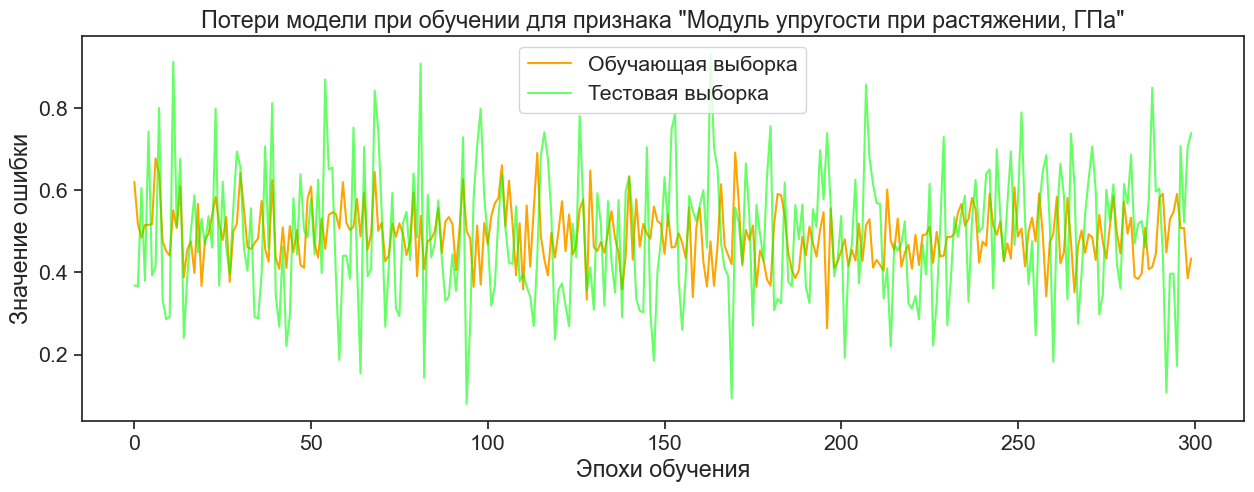

In [105]:
# визуализириуем данные для каждого признака
plt.figure(figsize = (15, 5))
plt.plot(net_pred_var, label='Прогнозные значения', color='orange')
plt.plot(y_test_var.iloc[:, 0].values, label="Тестовые значения", color='lime', alpha=0.6)
plt.title('Потери модели при обучении для признака "Модуль упругости при растяжении, ГПа"')
plt.ylabel('Значение ошибки')
plt.xlabel('Эпохи обучения')
plt.legend(['Обучающая выборка', 'Тестовая выборка'])
plt.show()

In [107]:
# сравним результаты работу всех 10 моделей
df_r2_var = {'Регрессор':['LinearRegression', 'LCV', 'Ridge', 'ElasticNet', 'RandomForest', 'KNeighbors', 'SVR', 'GradientBoosting', 'DecisionTree', 'Нейросеть'],
                'MAE':[lr_mae_var, LCV_mae_var, ridge_mae_var, elastic_mae_var, rfr_mae_var, knn_mae_var, svr_mae_var, gb_mae_var, dtr_mae_var, net_mae_var],
                'MSE':[lr_mse_var, LCV_mae_var, ridge_mae_var, elastic_mae_var, rfr_mae_var, knn_mae_var, svr_mae_var, gb_mae_var, dtr_mae_var, net_mse_var],
                'R2_train':[lr_r2_train_var, LCV_r2_train_var, ridge_r2_train_var, elastic_r2_train_var, rfr_r2_train_var, knn_r2_train_var, svr_r2_train_var, gb_r2_train_var, dtr_r2_train_var, net_r2_train_var],
                'R2':[lr_r2_var, LCV_r2_var, ridge_r2_var, elastic_r2_var, rfr_r2_var, knn_r2_var, svr_r2_var, gb_r2_var, dtr_r2_var, net_r2_var]} 
df_r2_var = pd.DataFrame(df_r2_var)
df_r2_var.sort_values(['R2'], ascending=False)

,Регрессор,MAE,MSE,R2_train,R2
7,GradientBoosting,0.131602,0.131602,0.002358,-0.000318
1,LCV,0.131824,0.131824,0.000000,-0.002754
3,ElasticNet,0.131824,0.131824,0.000000,-0.002754
6,SVR,0.131928,0.131928,-0.000273,-0.004879
2,Ridge,0.131964,0.131964,0.022056,-0.005636
0,LinearRegression,0.132295,0.026369,0.024792,-0.014067
8,DecisionTree,0.132848,0.132848,0.004824,-0.021762
4,RandomForest,0.132446,0.132446,0.003388,-0.037397
9,Нейросеть,0.141478,0.029918,0.356929,-0.150540
5,KNeighbors,0.183647,0.183647,1.000000,-1.054989


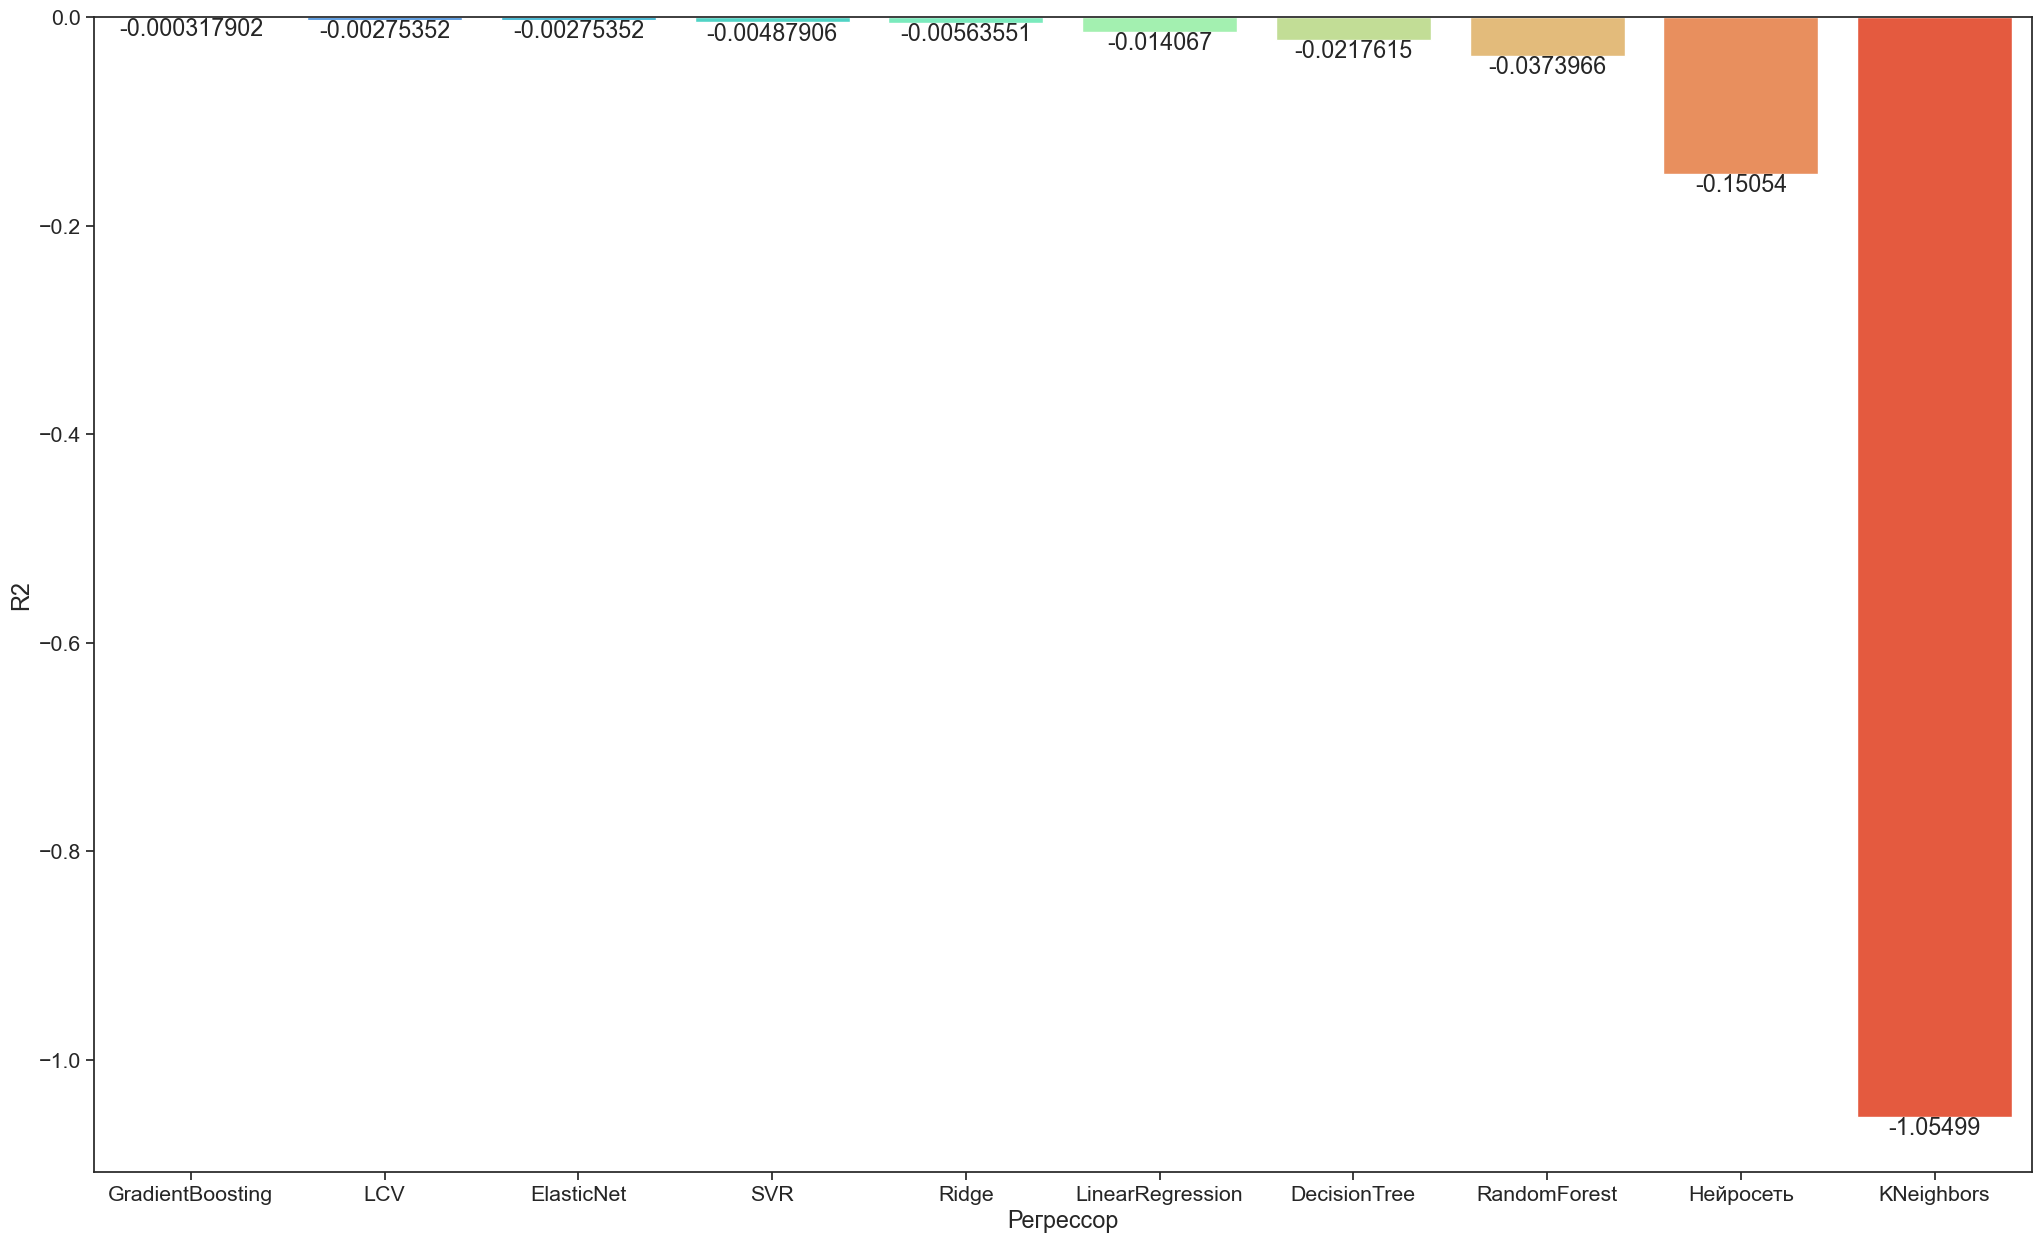

In [108]:
plt.figure(figsize = (25, 15))
ax = sns.barplot(data=df_r2_var, x=df_r2_var['Регрессор'], y=df_r2_var['R2'], palette='rainbow', order=df_r2_var.sort_values('R2',ascending = False).Регрессор)
for i in ax.containers:
    ax.bar_label(i,)

In [109]:
# Линейная регрессия отлично подошла для этой задачи

In [110]:
# с набором параметров для предсказания признака "Модуль упругости при растяжении, ГПа"
model_var = Pipeline([('preprocessing', MinMaxScaler()), ('regressor', LinearRegression())])
model_var.fit(X_train_var.values, y_train_var.iloc[:, 0].values) 

Pipeline(steps=[('preprocessing', MinMaxScaler()),
                ('regressor', LinearRegression())])

In [111]:
# работоспособность
model_var_before = model_var.predict(X_test_var)
model_var_before[0]

0.45442964648382883

In [113]:
model_var_before_out = model_var_before * (np.max(df_n['Модуль упругости при растяжении, ГПа'].values) - np.min(df_n['Модуль упругости при растяжении, ГПа'].values)) + np.min(df_n['Модуль упругости при растяжении, ГПа'].values)
model_var_before_out[0]

0.45442964648382883

In [114]:
X_va = df_n.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
y_va = df_n[['Модуль упругости при растяжении, ГПа']]
X_train_va, X_test_va, y_train_va, y_test_va = train_test_split(X_va, y_va, test_size=0.3, random_state=1)

In [115]:
# Линейная регрессия.
lr = LinearRegression()

#обучаем модель для предсказания признака "Модуль упругости при растяжении"
lr.fit(X_train_va, y_train_va.iloc[:, 0])
lr_pred_va = lr.predict(X_test_va)
lr_mae_va = mean_absolute_error(lr_pred_va, y_test_va)
lr_mse_va = mean_squared_error(y_test_va, lr_pred_va)
lr_r2_train_va = lr.score(X_train_va, y_train_va)
lr_r2_va = r2_score(y_test_va, lr_pred_va)
print('LinearRegression Results')
print(f'mae: {lr_mae_va.round(3)}')
print(f'mse: {lr_mse_va.round(3)}')
print(f'R2 на тренировочной выборке: {lr_r2_train_va.round(3)}')
print(f'R2 на тестовой выборке: {lr_r2_va.round(3)}')

LinearRegression Results
mae: 0.132
mse: 0.026
R2 на тренировочной выборке: 0.025
R2 на тестовой выборке: -0.014


In [116]:
#Гребневая регрессия 
ridge = RidgeCV()

#обучаем модель для предсказания признака "Модуль упругости при растяжении"
ridge.fit(X_train_va, y_train_var.iloc[:, 0])
ridge_pred_va = ridge.predict(X_test_va)
ridge_mae_va = mean_absolute_error(ridge_pred_va, y_test_va)
ridge_mse_va = mean_squared_error(y_test_va, ridge_pred_va)
ridge_r2_train_va = ridge.score(X_train_va, y_train_va)
ridge_r2_va= r2_score(y_test_va, ridge_pred_va)
print('RidgeCV Results')
print(f'mae: {ridge_mae_va.round(3)}')
print(f'mse: {ridge_mse_va.round(3)}')
print(f'R2 на тренировочной выборке: {ridge_r2_train_va.round(3)}')
print(f'R2 на тестовой выборке: {ridge_r2_va.round(3)}')

RidgeCV Results
mae: 0.132
mse: 0.026
R2 на тренировочной выборке: 0.022
R2 на тестовой выборке: -0.006


In [117]:
#LASSO (Least Absolute Shrinkage and Selection Operator)
LCV = LassoCV()

#обучаем модель для предсказания признака "Модуль упругости при растяжении"
LCV.fit(X_train_va, y_train_va.iloc[:, 0])
LCV_pred_va = LCV.predict(X_test_va)
LCV_mae_va = mean_absolute_error(LCV_pred_va, y_test_va)
LCV_mse_va = mean_squared_error(y_test_va, LCV_pred_va)
LCV_r2_train_va = LCV.score(X_train_va, y_train_va)
LCV_r2_va = r2_score(y_test_va, LCV_pred_va)
print('LassoCV Results')
print(f'mae: {LCV_mae_va.round(3)}')
print(f'mse: {LCV_mse_va.round(3)}')
print(f'R2 на тренировочной выборке: {LCV_r2_train_va.round(3)}')
print(f'R2 на тестовой выборке: {LCV_r2_va.round(3)}')

LassoCV Results
mae: 0.132
mse: 0.026
R2 на тренировочной выборке: 0.0
R2 на тестовой выборке: -0.003


In [118]:
#ElasticNet стремится объединить лучшее из гребневой регрессии и регрессии лассо, комбинируя регуляризацию L1 и L2
elastic = ElasticNetCV()

#обучаем модель для предсказания признака "Модуль упругости при растяжении"
elastic.fit(X_train_va, y_train_va.iloc[:, 0])
elastic_pred_va = (elastic.predict(X_test_va))
elastic_mae_va = mean_absolute_error(elastic_pred_va, y_test_va)
elastic_mse_va = mean_squared_error(y_test_va, elastic_pred_va)
elastic_r2_train_va = elastic.score(X_train_va, y_train_va)
elastic_r2_va = r2_score(y_test_va, elastic_pred_va)
print('ElasticNetCV Results')
print(f'mae: {elastic_mae_va.round(3)}')
print(f'mse: {elastic_mse_va.round(3)}')
print(f'R2 на тренировочной выборке: {elastic_r2_train_va.round(3)}')
print(f'R2 на тестовой выборке: {elastic_r2_va.round(3)}')

ElasticNetCV Results
mae: 0.132
mse: 0.026
R2 на тренировочной выборке: 0.0
R2 на тестовой выборке: -0.003


In [119]:
#из-за специфической и высокодисперсной природы регрессии, просто как задачи машинного обучения, 
#регрессоры дерева решений следует тщательно обрезать. для поиска оптимальной глубины дерева необходимо применить
#инструмент оптимизации поиска параметров GridSearchCV

#параметры, подаваемые на перекрестную проверку методу поиска по сетке
rfr_param_grid = {'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
                  'n_estimators': [1, 10, 20],
                  'max_depth': [1, 2, 5]}

#задаём параметры поиска лучшей комбинации гиперпараметров
rfr_gs_va = GridSearchCV(RandomForestRegressor(), rfr_param_grid, cv=9, n_jobs=-1, verbose=1)

rfr_gs_va.fit(X_train_var, y_train_va.iloc[:, 0]) #применяем поиск
print(f"Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {rfr_gs_va.best_params_}") #выводим лучшие параметры для наших выборок


Fitting 9 folds for each of 36 candidates, totalling 324 fits
Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {'criterion': 'friedman_mse', 'max_depth': 1, 'n_estimators': 20}


In [120]:
# Обучаем модель для предсказания признака "Модуль упругости при растяжении"
rfr = RandomForestRegressor(criterion='squared_error', n_estimators=1, max_depth=1)
rfr.fit(X_train_va, y_train_va.iloc[:, 0])
rfr_pred_va = rfr.predict(X_test_va)
rfr_mae_va = mean_absolute_error(rfr_pred_va, y_test_va)
rfr_mse_va = mean_squared_error(y_test_va, rfr_pred_va)
rfr_r2_train_va = rfr.score(X_train_va, y_train_va)
rfr_r2_va = r2_score(y_test_va, rfr_pred_va)
print('RandomForestRegressor Results')
print(f'mae: {rfr_mae_va.round(3)}')
print(f'mse: {rfr_mse_va.round(3)}')
print(f'R2 на тренировочной выборке: {rfr_r2_train_va.round(3)}')
print(f'R2 на тестовой выборке: {rfr_r2_va.round(3)}')

RandomForestRegressor Results
mae: 0.132
mse: 0.026
R2 на тренировочной выборке: 0.012
R2 на тестовой выборке: -0.007


In [121]:
# к-соседи 

KNeighbors = list(range(1, 31))
knn_param_grid = {'n_neighbors': range(1, 31)}

#задаём параметры поиска лучшей комбинации гиперпараметров
knn_gs_va = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=9, n_jobs=-1, verbose=1)

knn_gs_va.fit(X_train_va, y_train_va.iloc[:, 0]) #применяем поиск
print(f"Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {knn_gs_var.best_params_}")

Fitting 9 folds for each of 30 candidates, totalling 270 fits
Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {'n_neighbors': 29}


In [122]:
# обучаем
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train_va, y_train_va.iloc[:, 0])
knn_pred_va = knn.predict(X_test_va)
knn_mae_va = mean_absolute_error(knn_pred_va, y_test_va)
knn_mse_va = mean_squared_error(y_test_va, knn_pred_va)
knn_r2_train_va = knn.score(X_train_va, y_train_va)
knn_r2_va = r2_score(y_test_va, knn_pred_va)
print('KNeighborsRegressor Results')
print(f'mae: {knn_mae_va.round(3)}')
print(f'mse: {knn_mse_va.round(3)}')
print(f'R2 на тренировочной выборке: {knn_r2_train_va.round(3)}')
print(f'R2 на тестовой выборке: {knn_r2_va.round(3)}')

KNeighborsRegressor Results
mae: 0.184
mse: 0.053
R2 на тренировочной выборке: 1.0
R2 на тестовой выборке: -1.055


In [123]:
# Опорные вектора
svr_param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
      'C': [0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.005, 0.01, 0.1, 0.5]}

#поиск лучшей комбинации гиперпараметров
svr_gs_va = GridSearchCV(SVR(), svr_param_grid, cv=9, n_jobs=-1, verbose=1)

svr_gs_va.fit(X_train_var, y_train_va.iloc[:, 0]) #применяем поиск
print(f"Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {svr_gs_va.best_params_}") 

Fitting 9 folds for each of 40 candidates, totalling 360 fits
Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {'C': 0.005, 'kernel': 'rbf'}


In [124]:
# обучаем модель 
svr = SVR(C=1e-08, kernel='linear')
svr.fit(X_train_va, y_train_va.iloc[:, 0])
svr_pred_va = svr.predict(X_test_va)
svr_mae_va = mean_absolute_error(svr_pred_va, y_test_va)
svr_mse_va = mean_squared_error(y_test_va, svr_pred_va)
svr_r2_train_va = svr.score(X_train_va, y_train_va)
svr_r2_va = r2_score(y_test_va, svr_pred_va)
print('SVR Results')
print(f'mae: {svr_mae_va.round(3)}')
print(f'mse: {svr_mse_va.round(3)}')
print(f'R2 на тренировочной выборке: {svr_r2_train_va.round(3)}')
print(f'R2 на тестовой выборке: {svr_r2_va.round(3)}')

SVR Results
mae: 0.132
mse: 0.026
R2 на тренировочной выборке: -0.0
R2 на тестовой выборке: -0.005


In [125]:
# Градиентный бустинг
gb_param_grid = {'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'], 
                  'n_estimators': [1, 2, 5, 10],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 5, 10]}

#поиск лучшей комбинации гиперпараметров
gb_gs_va = GridSearchCV(GradientBoostingRegressor(), gb_param_grid, cv=9, 
                   n_jobs=-1, verbose=1)

gb_gs_va.fit(X_train_va, y_train_va.iloc[:, 0])
print(f"Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {gb_gs_va.best_params_}")

Fitting 9 folds for each of 320 candidates, totalling 2880 fits
Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {'loss': 'squared_error', 'max_depth': 4, 'max_features': 2, 'n_estimators': 2}


In [126]:
gb = GradientBoostingRegressor(loss='squared_error', max_depth=1, max_features=1, n_estimators=1)
gb.fit(X_train_va, y_train_va.iloc[:, 0])
gb_pred_va = gb.predict(X_test_va)
gb_mae_va = mean_absolute_error(gb_pred_va, y_test_va)
gb_mse_va = mean_squared_error(y_test_va, gb_pred_va)
gb_r2_train_va = gb.score(X_train_va, y_train_va)
gb_r2_va = r2_score(y_test_va, gb_pred_va)
print('GradientBoostingRegressor Results')
print(f'mae: {gb_mae_va.round(3)}')
print(f'mse: {gb_mse_va.round(3)}')
print(f'R2 на тренировочной выборке: {gb_r2_train_va.round(3)}')
print(f'R2 на тестовой выборке: {gb_r2_va.round(3)}')

GradientBoostingRegressor Results
mae: 0.132
mse: 0.026
R2 на тренировочной выборке: 0.001
R2 на тестовой выборке: -0.003


In [127]:
# Деревья решений
dtr_param_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5, 7, 9, 12],
                  'max_features': range(1, 15, 1)}

dtr_gs_va = GridSearchCV(DecisionTreeRegressor(), dtr_param_grid, cv=9, 
                   n_jobs=-1, verbose=1)

dtr_gs_va.fit(X_train_va, y_train_va.iloc [:, 0])
print(f"Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {dtr_gs_va.best_params_}")

Fitting 9 folds for each of 896 candidates, totalling 8064 fits
Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {'criterion': 'friedman_mse', 'max_depth': 3, 'max_features': 4, 'splitter': 'best'}


In [128]:
# обучаем
dtr = DecisionTreeRegressor(criterion='squared_error', max_depth=1, max_features=1, splitter='best')
dtr.fit(X_train_va, y_train_va.iloc[:, 0])
dtr_pred_va = dtr.predict(X_test_va)
dtr_mae_va = mean_absolute_error(dtr_pred_va, y_test_va)
dtr_mse_va = mean_squared_error(y_test_va, dtr_pred_va)
dtr_r2_train_va = dtr.score(X_train_va, y_train_va)
dtr_r2_va = r2_score(y_test_va, dtr_pred_va)
print('DecisionTreeRegressor Results')
print(f'mae: {dtr_mae_va.round(3)}')
print(f'mse: {dtr_mse_va.round(3)}')
print(f'R2 на тренировочной выборке: {dtr_r2_train_va.round(3)}')
print(f'R2 на тестовой выборке: {dtr_r2_va.round(3)}')

DecisionTreeRegressor Results
mae: 0.134
mse: 0.026
R2 на тренировочной выборке: 0.004
R2 на тестовой выборке: -0.016


Создаем нейронную сеть

In [130]:
net_va = Sequential()
net_va.add(Dense(128, input_dim=X_train_va.shape[1], activation='relu'))
net_va.add(Dense(8, activation='relu'))
net_va.add(Dense(8, activation='relu'))
net_va.add(Dense(1, activation='linear')) #выходной слой с одним линейным нейроном для решения задачи регрессии

In [131]:
print(net_va.summary()) #архитектура нашей модели

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1664      
                                                                 
 dense_5 (Dense)             (None, 8)                 1032      
                                                                 
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,777
Trainable params: 2,777
Non-trainable params: 0
_________________________________________________________________
None


In [132]:
net_va.compile(optimizer=Adam(0.001), loss='mse', metrics=['mae'])

In [133]:
#обучаем модель для предсказания признака "Прочность при растяжении, МПа"
history_va = net_va.fit(X_train_va, y_train_va.iloc[:, 0], epochs=100, validation_split=0.1, verbose=1)
#рассчитаем коэффицент детерминации искуственной нейронной сети для признака "Прочность при растяжении, МПа"
print(f'Коэффициент детерминации для признака "{y_train_va.columns[0]}": {r2_score(y_test_va.iloc[:, 0], (net_va.predict(X_test_va)))}')


Epoch 1/100
20/20 [==============================] - 3s 27ms/step - loss: 0.2220 - mae: 0.4203 - val_loss: 0.0409 - val_mae: 0.1698
Epoch 2/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0394 - mae: 0.1600 - val_loss: 0.0264 - val_mae: 0.1218
Epoch 3/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0327 - mae: 0.1449 - val_loss: 0.0256 - val_mae: 0.1231
Epoch 4/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0319 - mae: 0.1431 - val_loss: 0.0246 - val_mae: 0.1178
Epoch 5/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0314 - mae: 0.1424 - val_loss: 0.0241 - val_mae: 0.1174
Epoch 6/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0312 - mae: 0.1419 - val_loss: 0.0241 - val_mae: 0.1179
Epoch 7/100
20/20 [==============================] - 0s 13ms/step - loss: 0.0312 - mae: 0.1424 - val_loss: 0.0242 - val_mae: 0.1195
Epoch 8/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0308 -

Epoch 63/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0262 - mae: 0.1297 - val_loss: 0.0237 - val_mae: 0.1156
Epoch 64/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0263 - mae: 0.1306 - val_loss: 0.0241 - val_mae: 0.1176
Epoch 65/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0260 - mae: 0.1290 - val_loss: 0.0240 - val_mae: 0.1177
Epoch 66/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0260 - mae: 0.1293 - val_loss: 0.0234 - val_mae: 0.1163
Epoch 67/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0259 - mae: 0.1286 - val_loss: 0.0232 - val_mae: 0.1119
Epoch 68/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0257 - mae: 0.1277 - val_loss: 0.0239 - val_mae: 0.1162
Epoch 69/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0251 - mae: 0.1271 - val_loss: 0.0235 - val_mae: 0.1134
Epoch 70/100
20/20 [==============================] - 0s 8ms/step - loss: 0.

In [134]:
net_pred_va = net_va.predict(X_test_va)
net_mae_va = mean_absolute_error(net_pred_va, y_test_va)
net_mse_va = mean_squared_error(y_test_va, net_pred_va)
net_r2_train_va = r2_score(y_train_va, net_va.predict(X_train_va))
net_r2_va = r2_score(y_test_va, net_pred_va)
print('net Results')
print(f'mae: {net_mae_va.round(3)}')
print(f'mse: {net_mse_va.round(3)}')
print(f'R2 на тренировочной выборке: {net_r2_train_va.round(3)}')
print(f'R2 на тестовой выборке: {net_r2_va.round(3)}')

22/22 [==============================] - 0s 4ms/step
net Results
mae: 0.141
mse: 0.03
R2 на тренировочной выборке: 0.151
R2 на тестовой выборке: -0.164


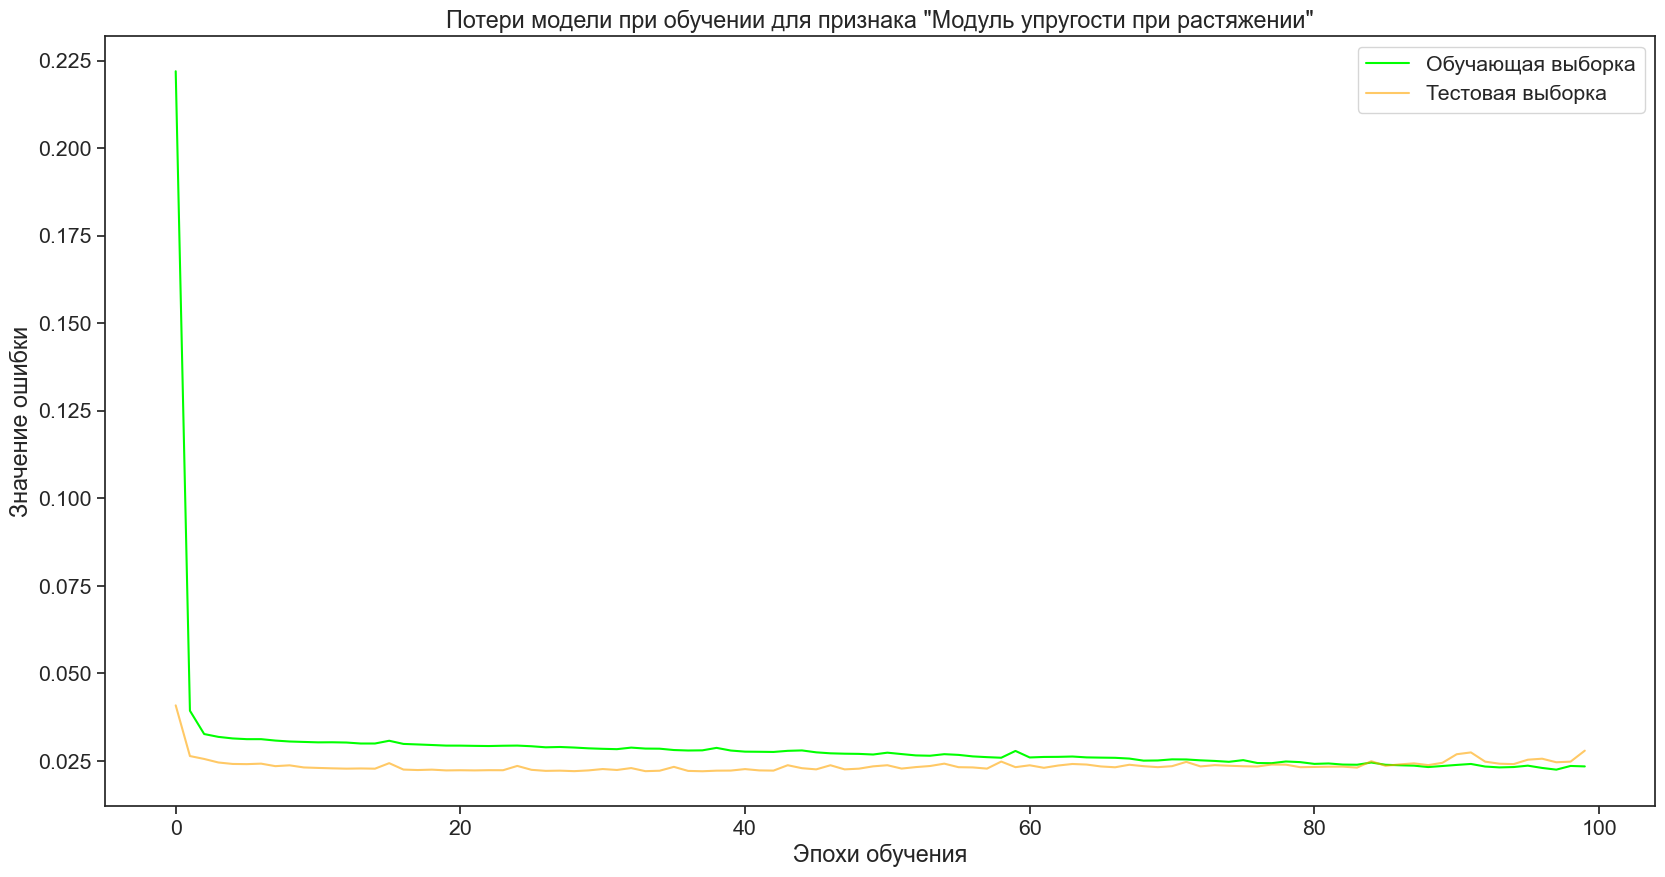

In [135]:
plt.figure(figsize = (20, 10))
sns.set(font_scale=1.4, style='ticks')
plt.plot(history_va.history['loss'], color='lime')
plt.plot(history_va.history['val_loss'], color='orange', alpha=0.6)
plt.title('Потери модели при обучении для признака "Модуль упругости при растяжении"')
plt.ylabel('Значение ошибки')
plt.xlabel('Эпохи обучения')
plt.legend(['Обучающая выборка', 'Тестовая выборка'])
plt.show()

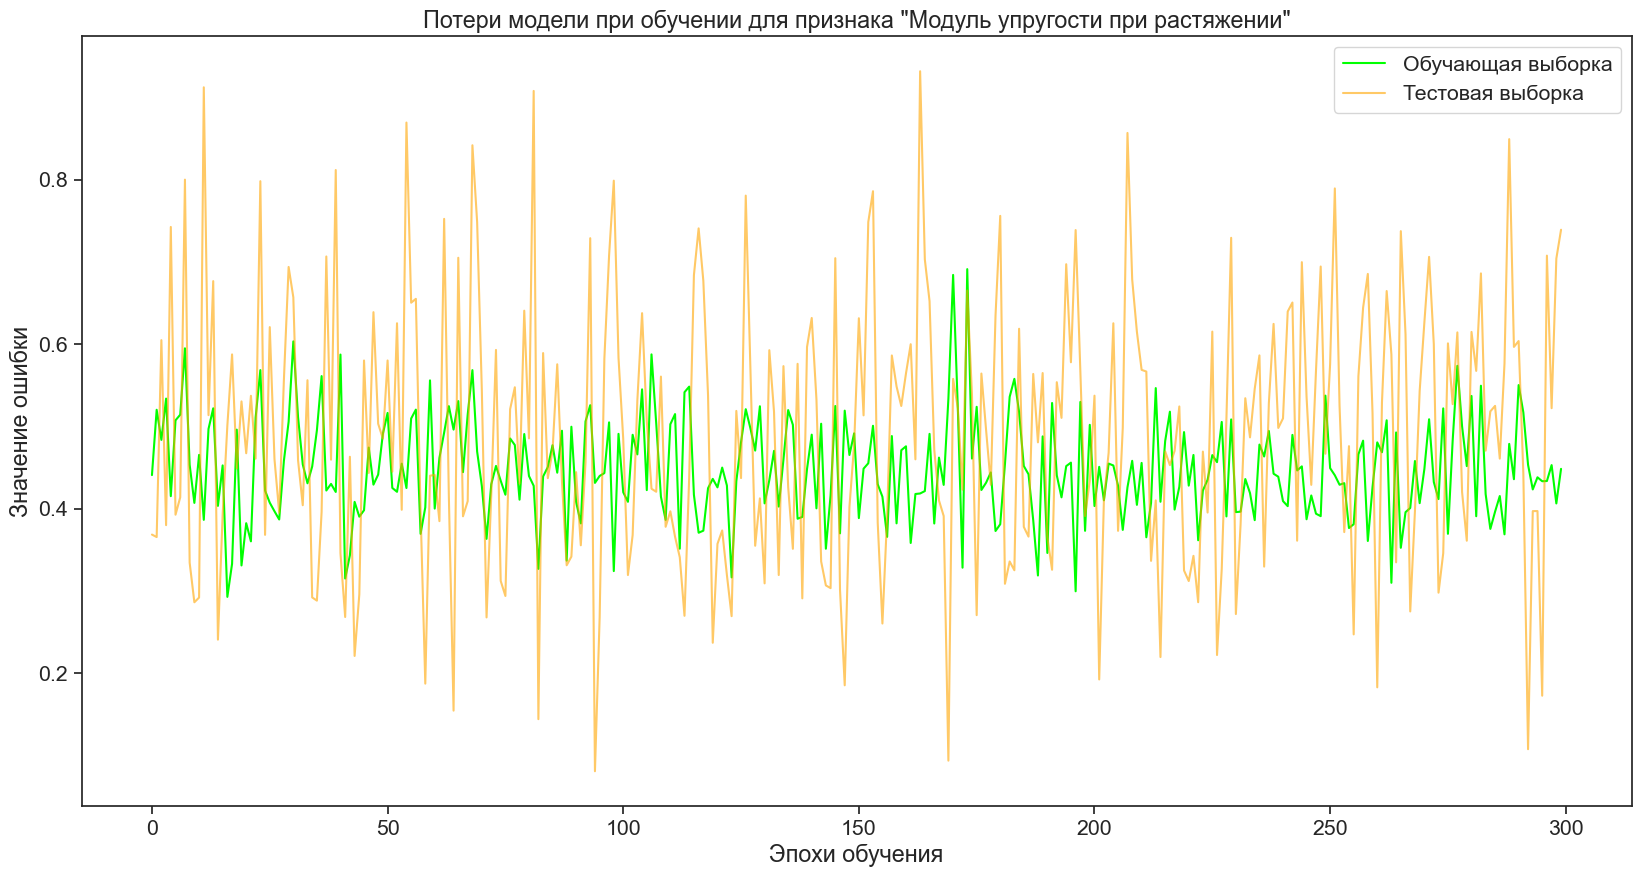

In [136]:
plt.figure(figsize = (20, 10))
plt.plot(net_pred_va, label='Прогнозные значения', color='lime')
plt.plot(y_test_va.iloc[:, 0].values, label="Тестовые значения", color='orange', alpha=0.6)
plt.title('Потери модели при обучении для признака "Модуль упругости при растяжении"')
plt.ylabel('Значение ошибки')
plt.xlabel('Эпохи обучения')
plt.legend(['Обучающая выборка', 'Тестовая выборка'])
plt.show()

In [139]:
df_r2_va = {'Регрессор':['LinearRegression', 'LCV', 'Ridge', 'ElasticNet', 'RandomForest', 'KNeighbors', 'SVR', 'GradientBoosting', 'DecisionTree', 'Нейросеть'],
                'MAE':[lr_mae_va, LCV_mae_va, ridge_mae_va, elastic_mae_va, rfr_mae_va, knn_mae_va, svr_mae_va, gb_mae_va, dtr_mae_va, net_mae_va],
                'MSE':[lr_mse_va, LCV_mae_va, ridge_mae_va, elastic_mae_va, rfr_mae_va, knn_mae_va, svr_mae_va, gb_mae_va, dtr_mae_va, net_mse_va],
                'R2_train':[lr_r2_train_va, LCV_r2_train_va, ridge_r2_train_va, elastic_r2_train_va, rfr_r2_train_va, knn_r2_train_va, svr_r2_train_va, gb_r2_train_va, dtr_r2_train_va, net_r2_train_va],
                'R2':[lr_r2_va, LCV_r2_va, ridge_r2_va, elastic_r2_va, rfr_r2_va, knn_r2_va, svr_r2_va, gb_r2_va, dtr_r2_va, net_r2_va]} 
df_r2_va = pd.DataFrame(df_r2_va)
df_r2_va.sort_values(['R2'], ascending=False)

,Регрессор,MAE,MSE,R2_train,R2
7,GradientBoosting,0.131959,0.131959,0.000721,-0.002719
1,LCV,0.131824,0.131824,0.000000,-0.002754
3,ElasticNet,0.131824,0.131824,0.000000,-0.002754
6,SVR,0.131928,0.131928,-0.000273,-0.004879
2,Ridge,0.131964,0.131964,0.022056,-0.005636
4,RandomForest,0.131913,0.131913,0.011535,-0.006784
0,LinearRegression,0.132295,0.026369,0.024792,-0.014067
8,DecisionTree,0.133593,0.133593,0.003796,-0.015560
9,Нейросеть,0.141328,0.030271,0.151200,-0.164115
5,KNeighbors,0.183647,0.183647,1.000000,-1.054989


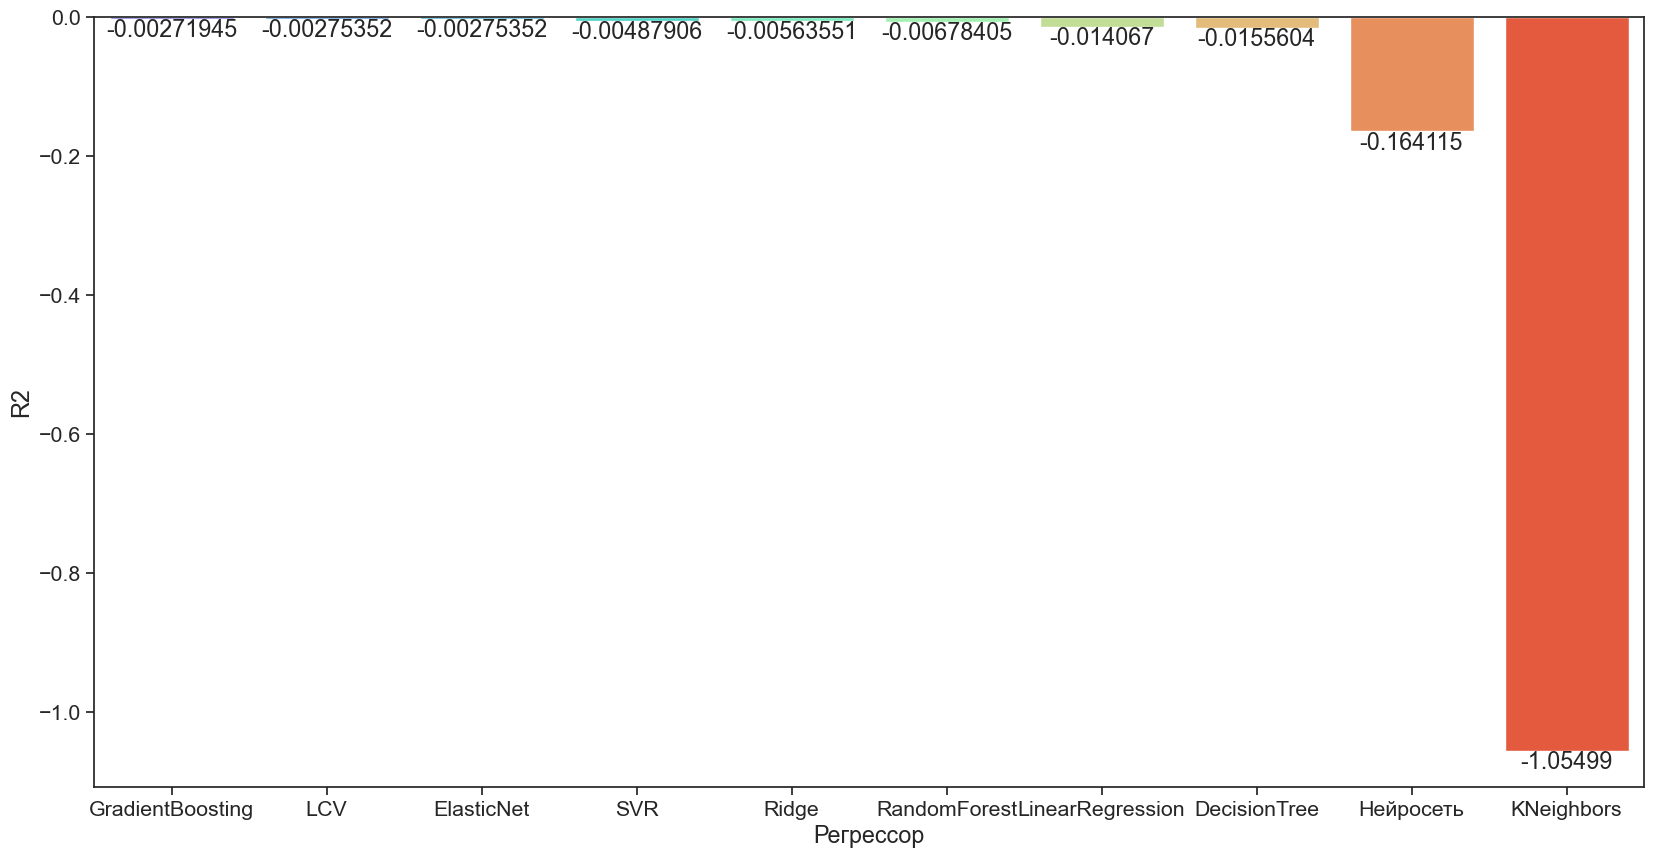

In [140]:
plt.figure(figsize = (20, 10))
ax = sns.barplot(data=df_r2_va, x=df_r2_va['Регрессор'], y=df_r2_va['R2'], palette='rainbow', order=df_r2_va.sort_values('R2',ascending = False).Регрессор)
for i in ax.containers:
    ax.bar_label(i,)

In [141]:
model_va = Pipeline([('preprocessing', MinMaxScaler()), ('regressor', LinearRegression())])
model_va.fit(X_train_va.values, y_train_va.iloc[:, 0].values) #добавляем .values для сохранения модели

Pipeline(steps=[('preprocessing', MinMaxScaler()),
                ('regressor', LinearRegression())])

In [142]:
model_va_before = model_va.predict(X_test_va)
model_va_before[0]

0.45442964648382883

In [143]:
# Разбиение на обучающую и тестовую выборки для прогноза соотношения матрица-наполнитель (mn)

In [144]:
X_mn = df_n.drop(['Соотношение матрица-наполнитель'], axis=1)
y_mn = df_n[['Соотношение матрица-наполнитель']]
X_train_mn, X_test_mn, y_train_mn, y_test_mn = train_test_split(X_mn, y_mn, test_size=0.3, random_state=1)

In [145]:
y_train_mn.shape[1]

1

In [146]:
lr.fit(X_train_mn, y_train_mn.iloc[:, 0])
lr_pred_mn = lr.predict(X_test_mn)
lr_mae_mn = mean_absolute_error(lr_pred_mn, y_test_mn)
lr_mse_mn = mean_squared_error(y_test_mn, lr_pred_mn)
lr_r2_train_mn = lr.score(X_train_mn, y_train_mn)
lr_r2_mn = r2_score(y_test_mn, lr_pred_mn)
print('LinearRegression Results')
print(f'mae: {lr_mae_mn.round(3)}')
print(f'mse: {lr_mse_mn.round(3)}')
print(f'R2 на тренировочной выборке: {lr_r2_train_mn.round(3)}')
print(f'R2 на тестовой выборке: {lr_r2_mn.round(3)}')

LinearRegression Results
mae: 0.146
mse: 0.033
R2 на тренировочной выборке: 0.017
R2 на тестовой выборке: -0.018


In [147]:
LCV.fit(X_train_mn, y_train_mn.iloc[:, 0])
LCV_pred_mn = LCV.predict(X_test_mn)
LCV_mae_mn = mean_absolute_error(LCV_pred_mn, y_test_mn)
LCV_mse_mn = mean_squared_error(y_test_mn, LCV_pred_mn)
LCV_r2_train_mn = LCV.score(X_train_mn, y_train_mn)
LCV_r2_mn = r2_score(y_test_mn, LCV_pred_mn)
print('LassoCV Results')
print(f'mae: {LCV_mae_mn.round(3)}')
print(f'mse: {LCV_mse_mn.round(3)}')
print(f'R2 на тренировочной выборке: {LCV_r2_train_mn.round(3)}')
print(f'R2 на тестовой выборке: {LCV_r2_mn.round(3)}')

LassoCV Results
mae: 0.144
mse: 0.032
R2 на тренировочной выборке: 0.009
R2 на тестовой выборке: -0.005


In [148]:
ridge.fit(X_train_mn, y_train_mn.iloc[:, 0])
ridge_pred_mn = ridge.predict(X_test_mn)
ridge_mae_mn = mean_absolute_error(ridge_pred_mn, y_test_mn)
ridge_mse_mn = mean_squared_error(y_test_mn, ridge_pred_mn)
ridge_r2_train_mn = ridge.score(X_train_mn, y_train_mn)
ridge_r2_mn = r2_score(y_test_mn, ridge_pred_mn)
print('RidgeCV Results')
print(f'mae: {ridge_mae_mn.round(3)}')
print(f'mse: {ridge_mse_mn.round(3)}')
print(f'R2 на тренировочной выборке: {ridge_r2_train_mn.round(3)}')
print(f'R2 на тестовой выборке: {ridge_r2_mn.round(3)}')

RidgeCV Results
mae: 0.145
mse: 0.032
R2 на тренировочной выборке: 0.016
R2 на тестовой выборке: -0.01


In [149]:
elastic.fit(X_train_mn, y_train_mn.iloc[:, 0])
elastic_pred_mn = elastic.predict(X_test_mn)
elastic_mae_mn = mean_absolute_error(elastic_pred_mn, y_test_mn)
elastic_mse_mn = mean_squared_error(y_test_mn, elastic_pred_mn)
elastic_r2_train_mn = elastic.score(X_train_mn, y_train_mn)
elastic_r2_mn = r2_score(y_test_mn, elastic_pred_mn)
print('ElasticNet Results')
print(f'mae: {elastic_mae_mn.round(3)}')
print(f'mse: {elastic_mse_mn.round(3)}')
print(f'R2 на тренировочной выборке: {elastic_r2_train_mn.round(3)}')
print(f'R2 на тестовой выборке: {elastic_r2_mn.round(3)}')

ElasticNet Results
mae: 0.144
mse: 0.032
R2 на тренировочной выборке: 0.008
R2 на тестовой выборке: -0.005


In [150]:
rfr_gs_mn = GridSearchCV(RandomForestRegressor(), rfr_param_grid, cv=9, n_jobs=-1, verbose=1)
rfr_gs_mn.fit(X_train_mn, y_train_mn.iloc[:, 0])
print(f"Лучшие параметры для предсказания признака 'Соотношение матрица-наполнитель' {rfr_gs_mn.best_params_}")

Fitting 9 folds for each of 36 candidates, totalling 324 fits
Лучшие параметры для предсказания признака 'Соотношение матрица-наполнитель' {'criterion': 'absolute_error', 'max_depth': 1, 'n_estimators': 20}


In [151]:
rfr = RandomForestRegressor(criterion='squared_error', n_estimators=1, max_depth=1)
rfr.fit(X_train_mn, y_train_mn.iloc[:, 0])
rfr_pred_mn = rfr.predict(X_test_mn)
rfr_mae_mn = mean_absolute_error(rfr_pred_mn, y_test_mn)
rfr_mse_mn = mean_squared_error(y_test_mn, rfr_pred_mn)
rfr_r2_train_mn = rfr.score(X_train_mn, y_train_mn)
rfr_r2_mn = r2_score(y_test_mn, rfr_pred_mn)
print('RandomForestRegressor Results')
print(f'mae: {rfr_mae_mn.round(3)}')
print(f'mse: {rfr_mse_mn.round(3)}')
print(f'R2 на тренировочной выборке: {rfr_r2_train_mn.round(3)}')
print(f'R2 на тестовой выборке: {rfr_r2_mn.round(3)}')

RandomForestRegressor Results
mae: 0.146
mse: 0.033
R2 на тренировочной выборке: -0.01
R2 на тестовой выборке: -0.018


In [152]:
knn_gs_mn = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=9, n_jobs=-1, verbose=1)
knn_gs_mn.fit(X_train_mn, y_train_mn.iloc[:, 0])
print(f"Лучшие параметры для предсказания признака 'Соотношение матрица-наполнитель' {knn_gs_mn.best_params_}")

Fitting 9 folds for each of 30 candidates, totalling 270 fits
Лучшие параметры для предсказания признака 'Соотношение матрица-наполнитель' {'n_neighbors': 30}


In [153]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train_mn, y_train_mn.iloc[:, 0])
knn_pred_mn = knn.predict(X_test_mn)
knn_mae_mn = mean_absolute_error(knn_pred_mn, y_test_mn)
knn_mse_mn = mean_squared_error(y_test_mn, knn_pred_mn)
knn_r2_train_mn = knn.score(X_train_mn, y_train_mn)
knn_r2_mn = r2_score(y_test_mn, knn_pred_mn)
print('KNeighborsRegressor Results')
print(f'mae: {knn_mae_mn.round(3)}')
print(f'mse: {knn_mse_mn.round(3)}')
print(f'R2 на тренировочной выборке: {knn_r2_train_mn.round(3)}')
print(f'R2 на тестовой выборке: {knn_r2_mn.round(3)}')

KNeighborsRegressor Results
mae: 0.219
mse: 0.072
R2 на тренировочной выборке: 1.0
R2 на тестовой выборке: -1.26


In [154]:
svr_gs_mn = GridSearchCV(SVR(), svr_param_grid, cv=9, n_jobs=-1, verbose=1)
svr_gs_mn.fit(X_train_mn, y_train_mn.iloc[:, 0])
print(f"Лучшие параметры для предсказания признака 'Прочность при растяжении, МПа' {svr_gs_mn.best_params_}")

Fitting 9 folds for each of 40 candidates, totalling 360 fits
Лучшие параметры для предсказания признака 'Прочность при растяжении, МПа' {'C': 0.005, 'kernel': 'rbf'}


In [155]:
svr = SVR(C=1e-08, kernel='linear')
svr.fit(X_train_mn, y_train_mn.iloc[:, 0])
svr_pred_mn = svr.predict(X_test_mn)
svr_mae_mn = mean_absolute_error(svr_pred_mn, y_test_mn)
svr_mse_mn = mean_squared_error(y_test_mn, svr_pred_mn)
svr_r2_train_mn = svr.score(X_train_mn, y_train_mn)
svr_r2_mn = r2_score(y_test_mn, svr_pred_mn)
print('SVR Results')
print(f'mae: {svr_mae_mn.round(3)}')
print(f'mse: {svr_mse_mn.round(3)}')
print(f'R2 на тренировочной выборке: {svr_r2_train_mn.round(3)}')
print(f'R2 на тестовой выборке: {svr_r2_mn.round(3)}')

SVR Results
mae: 0.143
mse: 0.032
R2 на тренировочной выборке: -0.0
R2 на тестовой выборке: -0.001


In [156]:
gb_gs_mn = GridSearchCV(GradientBoostingRegressor(), gb_param_grid, cv=9, n_jobs=-1, verbose=1)
gb_gs_mn.fit(X_train_mn, y_train_mn.iloc[:, 0])
print(f"Лучшие параметры для предсказания признака 'Прочность при растяжении, МПа' {gb_gs_mn.best_params_}")

Fitting 9 folds for each of 320 candidates, totalling 2880 fits
Лучшие параметры для предсказания признака 'Прочность при растяжении, МПа' {'loss': 'squared_error', 'max_depth': 2, 'max_features': 1, 'n_estimators': 2}


In [157]:
gb = GradientBoostingRegressor(loss='squared_error', max_depth=1, max_features=1, n_estimators=1)
gb.fit(X_train_mn, y_train_mn.iloc[:, 0])
gb_pred_mn = gb.predict(X_test_mn)
gb_mae_mn = mean_absolute_error(gb_pred_mn, y_test_mn)
gb_mse_mn = mean_squared_error(y_test_mn, gb_pred_mn)
gb_r2_train_mn = gb.score(X_train_mn, y_train_mn)
gb_r2_mn = r2_score(y_test_mn, gb_pred_mn)
print('GradientBoostingRegressor Results')
print(f'mae: {gb_mae_mn.round(3)}')
print(f'mse: {gb_mse_mn.round(3)}')
print(f'R2 на тренировочной выборке: {gb_r2_train_mn.round(3)}')
print(f'R2 на тестовой выборке: {gb_r2_mn.round(3)}')

GradientBoostingRegressor Results
mae: 0.143
mse: 0.032
R2 на тренировочной выборке: 0.002
R2 на тестовой выборке: -0.002


In [158]:
dtr_gs_mn = GridSearchCV(DecisionTreeRegressor(), dtr_param_grid, cv=9, n_jobs=-1, verbose=1)
dtr_gs_mn.fit(X_train_mn, y_train_mn.iloc[:, 0])
print(f"Лучшие параметры для предсказания признака 'Прочность при растяжении, МПа' {dtr_gs_mn.best_params_}")

Fitting 9 folds for each of 896 candidates, totalling 8064 fits
Лучшие параметры для предсказания признака 'Прочность при растяжении, МПа' {'criterion': 'poisson', 'max_depth': 2, 'max_features': 3, 'splitter': 'random'}


In [159]:
dtr = DecisionTreeRegressor(criterion='squared_error', max_depth=1, max_features=1, splitter='best')
dtr.fit(X_train_mn, y_train_mn.iloc[:, 0])
dtr_pred_mn = dtr.predict(X_test_mn)
dtr_mae_mn = mean_absolute_error(dtr_pred_mn, y_test_mn)
dtr_mse_mn = mean_squared_error(y_test_mn, dtr_pred_mn)
dtr_r2_train_mn = dtr.score(X_train_mn, y_train_mn)
dtr_r2_mn = r2_score(y_test_mn, dtr_pred_mn)
print('DecisionTreeRegressor Results')
print(f'mae: {dtr_mae_mn.round(3)}')
print(f'mse: {dtr_mse_mn.round(3)}')
print(f'R2 на тренировочной выборке: {dtr_r2_train_mn.round(3)}')
print(f'R2 на тестовой выборке: {dtr_r2_mn.round(3)}')

DecisionTreeRegressor Results
mae: 0.144
mse: 0.032
R2 на тренировочной выборке: 0.011
R2 на тестовой выборке: -0.001


In [160]:
net_mn = Sequential()
net_mn.add(Dense(128, input_dim=X_train_mn.shape[1], activation='relu'))
net_mn.add(Dense(8, activation='relu'))
net_mn.add(Dense(8, activation='relu'))
net_mn.add(Dense(1, activation='linear')) #выходной слой с одним линейным нейроном для решения задачи регресси

In [161]:
print(net_mn.summary()) #архитектура нашей модели

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1664      
                                                                 
 dense_9 (Dense)             (None, 8)                 1032      
                                                                 
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,777
Trainable params: 2,777
Non-trainable params: 0
_________________________________________________________________
None


In [162]:
net_mn.compile(optimizer=Adam(0.001), loss='mse', metrics=['mae'])

In [238]:
#обучаем модель для предсказания признака "Соотношение матрица-наполнитель"
history_mn = net_mn.fit(X_train_mn, y_train_mn.iloc[:, 0], epochs=100, validation_split=0.1, verbose=1)
#рассчитаем коэффицент детерминации искуственной нейронной сети для признака "Соотношение матрица-наполнитель"
print(f'Коэффициент детерминации для признака "{y_train_mn.columns[0]}": {r2_score(y_test_mn.iloc[:, 0], (net_mn.predict(X_test_mn)))}')


Epoch 1/100
20/20 [==============================] - 0s 17ms/step - loss: 0.0230 - mae: 0.1216 - val_loss: 0.0335 - val_mae: 0.1486
Epoch 2/100
20/20 [==============================] - 0s 13ms/step - loss: 0.0231 - mae: 0.1216 - val_loss: 0.0351 - val_mae: 0.1499
Epoch 3/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0231 - mae: 0.1222 - val_loss: 0.0339 - val_mae: 0.1481
Epoch 4/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0226 - mae: 0.1205 - val_loss: 0.0341 - val_mae: 0.1484
Epoch 5/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0229 - mae: 0.1216 - val_loss: 0.0365 - val_mae: 0.1521
Epoch 6/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0226 - mae: 0.1209 - val_loss: 0.0355 - val_mae: 0.1503
Epoch 7/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0230 - mae: 0.1212 - val_loss: 0.0352 - val_mae: 0.1495
Epoch 8/100
20/20 [==============================] - 0s 10ms/step - loss: 0.

Epoch 63/100
20/20 [==============================] - 0s 12ms/step - loss: 0.0167 - mae: 0.1011 - val_loss: 0.0447 - val_mae: 0.1641
Epoch 64/100
20/20 [==============================] - 0s 12ms/step - loss: 0.0172 - mae: 0.1046 - val_loss: 0.0443 - val_mae: 0.1671
Epoch 65/100
20/20 [==============================] - 0s 12ms/step - loss: 0.0174 - mae: 0.1035 - val_loss: 0.0465 - val_mae: 0.1695
Epoch 66/100
20/20 [==============================] - 0s 13ms/step - loss: 0.0173 - mae: 0.1029 - val_loss: 0.0448 - val_mae: 0.1681
Epoch 67/100
20/20 [==============================] - 0s 12ms/step - loss: 0.0175 - mae: 0.1042 - val_loss: 0.0442 - val_mae: 0.1673
Epoch 68/100
20/20 [==============================] - 0s 14ms/step - loss: 0.0180 - mae: 0.1062 - val_loss: 0.0474 - val_mae: 0.1730
Epoch 69/100
20/20 [==============================] - 0s 15ms/step - loss: 0.0169 - mae: 0.1016 - val_loss: 0.0433 - val_mae: 0.1651
Epoch 70/100
20/20 [==============================] - 0s 14ms/step - 

In [164]:
net_pred_mn = net_mn.predict(X_test_mn)
net_mae_mn = mean_absolute_error(net_pred_mn, y_test_mn)
net_mse_mn = mean_squared_error(y_test_mn, net_pred_mn)
net_r2_train_mn = r2_score(y_train_mn, net_mn.predict(X_train_mn))
net_r2_mn = r2_score(y_test_mn, net_pred_mn)
print('net Results')
print(f'mae: {net_mae_mn.round(3)}')
print(f'mse: {net_mse_mn.round(3)}')
print(f'R2 на тренировочной выборке: {net_r2_train_mn.round(3)}')
print(f'R2 на тестовой выборке: {net_r2_mn.round(3)}')

22/22 [==============================] - 0s 3ms/step
net Results
mae: 0.156
mse: 0.036
R2 на тренировочной выборке: 0.215
R2 на тестовой выборке: -0.139


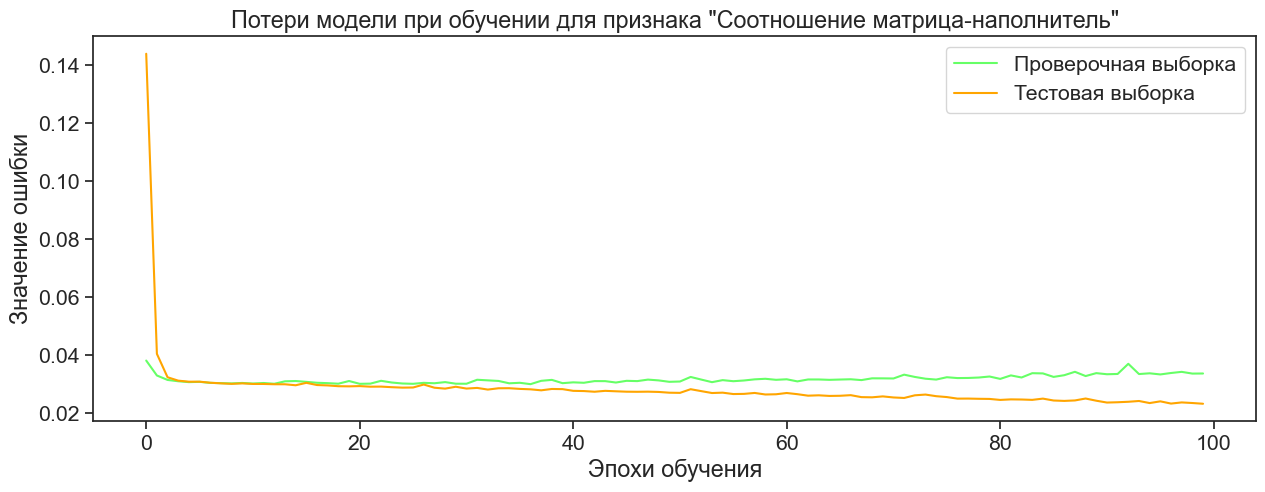

In [165]:
# визуализируем график потерь модели при обучении
plt.figure(figsize = (15, 5))
sns.set(font_scale=1.4, style='ticks')
plt.plot(history_mn.history['val_loss'], color='lime', alpha=0.6)
plt.plot(history_mn.history['loss'], color='orange')
plt.title('Потери модели при обучении для признака "Соотношение матрица-наполнитель"')
plt.ylabel('Значение ошибки')
plt.xlabel('Эпохи обучения')
plt.legend(['Проверочная выборка', 'Тестовая выборка'])
plt.show()

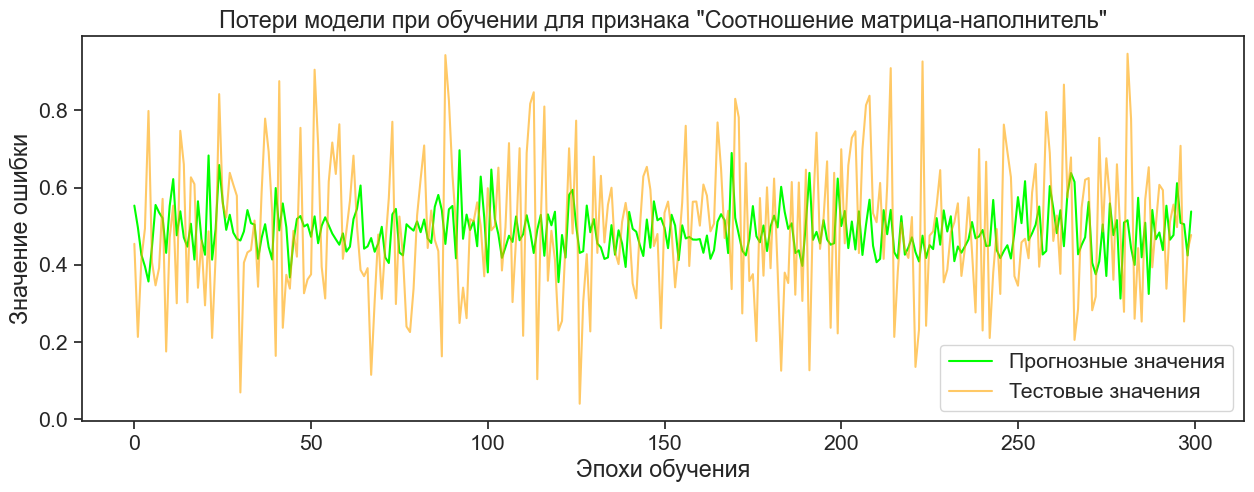

In [166]:
# визуализириуем качество обобщения искусственной нейронной сети на тестовых данных
plt.figure(figsize = (15, 5))
plt.plot(net_pred_mn, label='Прогнозные значения', color='lime')
plt.plot(y_test_mn.iloc[:, 0].values, label='Тестовые значения',  alpha=0.6, color='orange')
plt.title('Потери модели при обучении для признака "Соотношение матрица-наполнитель"')
plt.ylabel('Значение ошибки')
plt.xlabel('Эпохи обучения')
plt.legend(['Прогнозные значения', 'Тестовые значения'])
plt.show()

In [168]:
#сравним результаты работы всех 10 моделей, прогнозирующих признак "Соотношение матрица-наполнитель"
df_r2_mn = {'Регрессор':['LinearRegression', 'LCV', 'Ridge', 'ElasticNet', 'RandomForest', 'KNeighbors', 'SVR', 'GradientBoosting', 'DecisionTree', 'Нейросеть'],
                'MAE':[lr_mae_mn, LCV_mae_mn, ridge_mae_mn, elastic_mae_mn, rfr_mae_mn, knn_mae_mn, svr_mae_mn, gb_mae_mn, dtr_mae_mn, net_mae_mn],
                'MSE':[lr_mse_mn, LCV_mae_mn, ridge_mae_mn, elastic_mae_mn, rfr_mae_mn, knn_mae_mn, svr_mae_mn, gb_mae_mn, dtr_mae_mn, net_mse_mn],
                'R2_train':[lr_r2_train_mn, LCV_r2_train_mn, ridge_r2_train_mn, elastic_r2_train_mn, rfr_r2_train_mn, knn_r2_train_mn, svr_r2_train_mn, gb_r2_train_mn, dtr_r2_train_mn, net_r2_train_mn],
                'R2':[lr_r2_mn, LCV_r2_mn, ridge_r2_mn, elastic_r2_mn, rfr_r2_mn, knn_r2_mn, svr_r2_mn, gb_r2_mn, dtr_r2_mn, net_r2_mn]} 
df_r2_mn = pd.DataFrame(df_r2_mn)
df_r2_mn.sort_values(['R2'], ascending=False)

,Регрессор,MAE,MSE,R2_train,R2
6,SVR,0.143184,0.143184,-0.000185,-0.000771
8,DecisionTree,0.144171,0.144171,0.010805,-0.001048
7,GradientBoosting,0.143227,0.143227,0.001899,-0.002253
3,ElasticNet,0.143643,0.143643,0.008437,-0.004657
1,LCV,0.143683,0.143683,0.008699,-0.004920
2,Ridge,0.144907,0.144907,0.015807,-0.009924
0,LinearRegression,0.145935,0.032554,0.017423,-0.017917
4,RandomForest,0.146214,0.146214,-0.009692,-0.017965
9,Нейросеть,0.156149,0.036417,0.214902,-0.138717
5,KNeighbors,0.219068,0.219068,1.000000,-1.259816


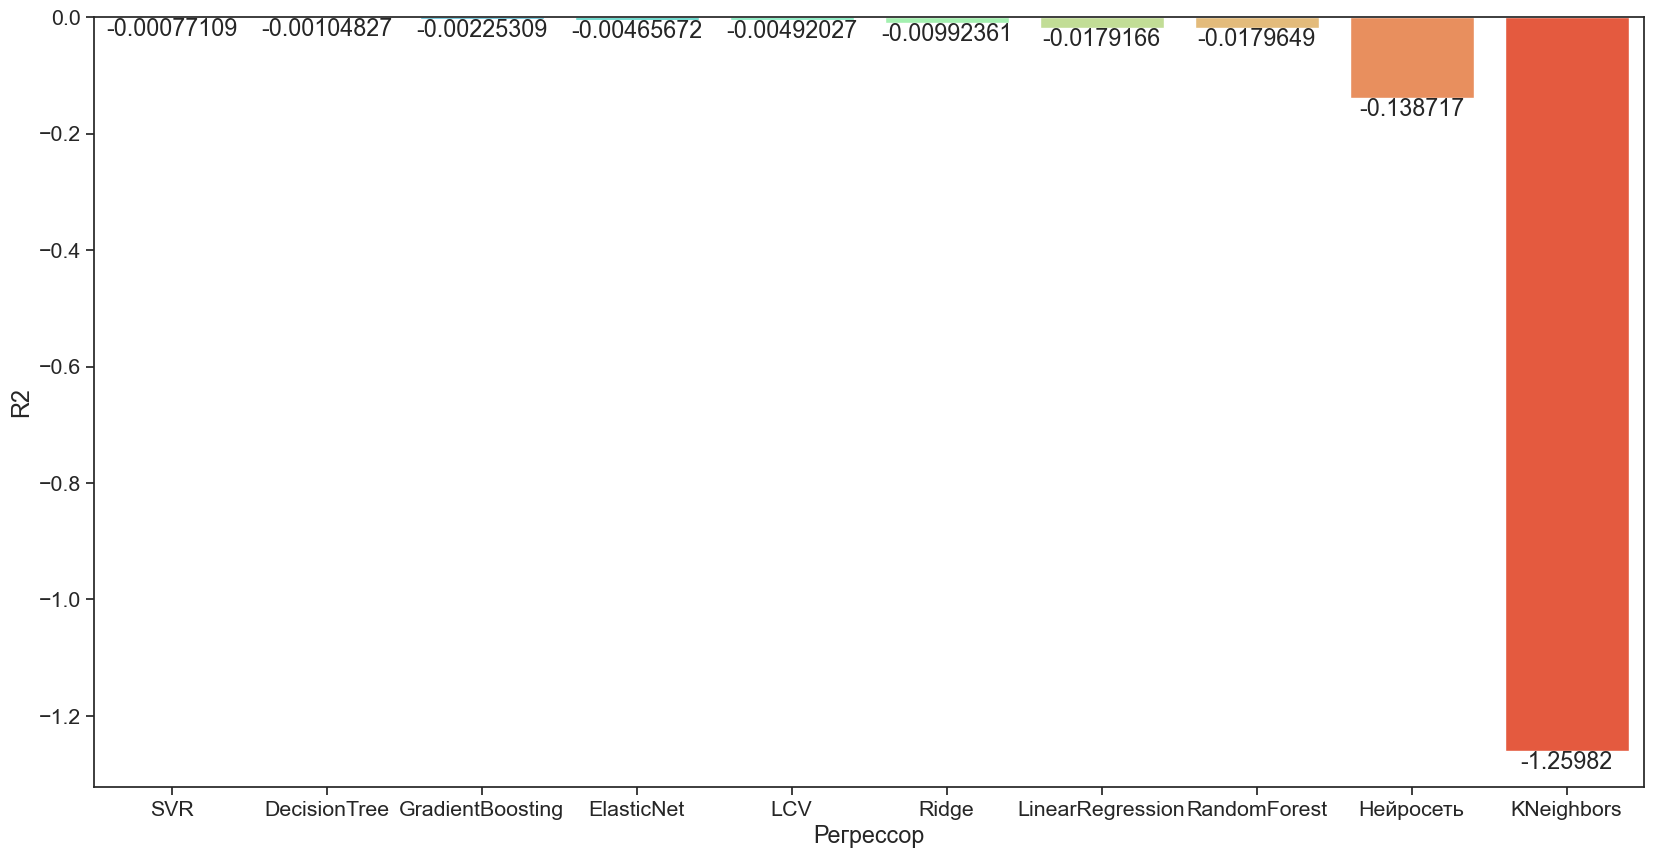

In [169]:
plt.figure(figsize = (20, 10))
ax = sns.barplot(data=df_r2_mn, x=df_r2_mn['Регрессор'], y=df_r2_mn['R2'], palette='rainbow', order=df_r2_mn.sort_values('R2',ascending = False).Регрессор)
for i in ax.containers:
    ax.bar_label(i,)

In [170]:
#с набором параметров для предсказания признака "Соотношение матрица-наполнитель"
best_model_mn = Pipeline([('preprocessing', MinMaxScaler()), ('regressor', GradientBoostingRegressor(loss='squared_error', max_depth=1, max_features=1, n_estimators=1))])
best_model_mn.fit(X_train_mn.values, y_train_mn.iloc[:, 0].values) #добавляем .values для сохранения модели

Pipeline(steps=[('preprocessing', MinMaxScaler()),
                ('regressor',
                 GradientBoostingRegressor(max_depth=1, max_features=1,
                                           n_estimators=1))])

In [171]:
#проверяем работоспособность модели
best_model_mn_before = best_model_mn.predict(X_test_mn)
best_model_mn_before[0]

0.4872596874687901

In [196]:
#сохраняем модель предсказывающую признак "Соотношение матрица-наполнитель"
with open('data/flask_app/models/best_model_mn.pkl','wb') as outp:
    pickle.dump(best_model_mn, outp)

In [197]:
#создаём нормализатор входных значений и сохраняем его
scaler_in_mn = MinMaxScaler().fit(df_clean[df_clean.columns.drop('Соотношение матрица-наполнитель')].values)
with open('data/flask_app/models/scaler_in_mn.pkl','wb') as outp:
    pickle.dump(scaler_in_mn, outp)

In [198]:
#первая часть денормализатора которая будет умножаться на предсказанное значение
scaler_out_mn1= np.max(df_clean['Соотношение матрица-наполнитель'].values)
- np.min(df_clean['Соотношение матрица-наполнитель'].values)

with open('data/flask_app/models/scaler_out_mn1.pkl','wb') as outp:
    pickle.dump(scaler_out_mn1, outp)

In [199]:
#вторая часть денормализатора которая будет прибавляться
scaler_out_mn2 = np.min(df_clean['Соотношение матрица-наполнитель'].values)

with open('data/flask_app/models/scaler_out_mn2.pkl','wb') as outp:
    pickle.dump(scaler_out_mn2, outp)

In [200]:
#загружаем модель и проверяем её работоспособность
with open('data/flask_app/models/best_model_mn.pkl', 'rb') as inp:
    best_model_mn = pickle.load(inp)
    
best_model_mn_after = best_model_mn.predict(X_test_mn)

#проверяем каждое старое прогнозное значение с новым. функция all возвращает true, если логическая маска
#целиком состоит из значений true. 
print((best_model_mn_before==best_model_mn_after).all())

True
